# Project 2 Shiny App Development

# Evaluating the Effectiveness and Equity of Disaster Relief Efforts: An Analysis of Socio-economic Influences and Aid Distribution

The dataset we used for this project is from OpenFEMA Data Sets on https://www.fema.gov/about/openfema/data-sets
We specificly use these three dataset below:
1. OpenFEMA Dataset: Housing Assistance Program Data - Owners - v2 on https://www.fema.gov/openfema-data-page/housing-assistance-program-data-owners-v2
2. OpenFEMA Dataset: Housing Assistance Program Data - Renters - v2 on https://www.fema.gov/openfema-data-page/housing-assistance-program-data-renters-v2
3. OpenFEMA Dataset: Individual Assistance Housing Registrants - Large Disasters - v1 on https://www.fema.gov/openfema-data-page/individual-assistance-housing-registrants-large-disasters-v1

## Introduction

Through an extensive analysis spanning multiple datasets, our investigation focus on several key aspects of disaster relief and insurance decisions, leveraging the power of data visualization within a Shiny app environment.   This exploration was guided by questions concerning the relationship between income and insurance purchase decisions, the dynamics of disaster relief across different subsidies, and the distribution and approval rates of FEMA assistance across various counties and between renters and owners.

In analyzing these three datasets, we aim to address five critical questions through data visualization techniques, particularly employing a Shiny app for interactive representation.  Our investigations revolve around the following inquiries:

1. Whether there is a logical relationship between gross income and whether to purchase insurance.
2. The relationship between 'totalApprovedIhpAmount' (total subsidy), namely 'rentalAmount' (rental subsidy), 'otherNeedsAmount' (other need subsidy), 'repairReplaceAmount' (resettlement subsidy)
3. What are the most affected counties in terms of the number of valid registrations, total inspected properties with major damage, and FEMA assistance approvals?
4. The most affected counties in terms of the number of valid registrations and FEMA assistance approvals, and if there are correlation between the number of valid registrations and FEMA assistance approvals, “Reasonableness of FEMA assistance approvals” which is if the county where has more valid registrations can get more FEMA assistance approvals
5. For both owner and renter, what is the relationship between the number of applications and approvals for fema assistance.

## 1. Whether there is a logical relationship between gross income and whether to purchase insurance.

### preprocessing

In [11]:
import pandas as pd

data = pd.read_csv("Disasters.csv")
df = pd.DataFrame(data)

FL = df[df['damagedStateAbbreviation'].isin(['FL'])]
# print(FL)
TX = df[df['damagedStateAbbreviation'].isin(['TX'])]
# print(TX)

# FL.to_csv("FL.csv", index=False)

# TX.to_csv("TX.csv", index=False)

In [12]:
#print
data = pd.read_csv("FL.csv")
clean_FL = pd.DataFrame(data)
clean_FL.head()

,disasterNumber,damagedCity,damagedStateAbbreviation,damagedZipCode,householdComposition,grossIncome,specialNeeds,ownRent,residenceType,homeOwnersInsurance,...,rentalAssistanceEndDate,rentalResourceCity,rentalResourceStateAbbreviation,rentalResourceZipCode,primaryResidence,personalPropertyEligible,ppfvl,censusBlockId,id,censusYear
0,4337,SARASOTA,FL,34238.0,1,NaN,0,Renter,Condo,0,...,NaN,NaN,NaN,NaN,1.0,0,NaN,1.211500e+14,e7b10c4f-adec-4a58-a4fc-85b5a20dfa4c,2010.0
1,4337,KISSIMMEE,FL,34758.0,1,28000.0,0,Renter,House/Duplex,0,...,NaN,NaN,NaN,NaN,1.0,0,0.0,1.209704e+14,0832cc95-c445-4429-956c-e2d1864d37ac,2010.0
2,4337,OVIEDO,FL,32765.0,4,NaN,0,Owner,House/Duplex,1,...,NaN,NaN,NaN,NaN,1.0,0,NaN,1.211702e+14,e721b814-9650-42e0-9a53-71da1e43294e,2010.0
3,4337,NAPLES,FL,34116.0,4,28000.0,0,Renter,Apartment,0,...,NaN,NaN,NaN,NaN,1.0,0,NaN,1.202101e+14,bfe940b0-5c0d-4b06-a2ba-424e728f220d,2010.0
4,4337,TAMARAC,FL,33321.0,3,NaN,0,Owner,House/Duplex,1,...,NaN,NaN,NaN,NaN,1.0,0,NaN,1.201102e+14,5cb02b42-ce4c-47f3-b298-6403ed6ed398,2010.0


In [13]:
data = pd.read_csv("TX.csv")
clean_TX = pd.DataFrame(data)
clean_TX.head()

,disasterNumber,damagedCity,damagedStateAbbreviation,damagedZipCode,householdComposition,grossIncome,specialNeeds,ownRent,residenceType,homeOwnersInsurance,...,rentalAssistanceEndDate,rentalResourceCity,rentalResourceStateAbbreviation,rentalResourceZipCode,primaryResidence,personalPropertyEligible,ppfvl,censusBlockId,id,censusYear
0,4332,HOUSTON,TX,77036.0,1,1800.0,1,Renter,Apartment,0,...,NaN,NaN,NaN,NaN,1.0,0,NaN,4.820143e+14,d214ed1e-951e-484b-b014-2a885a7ea234,2010.0
1,4332,HOUSTON,TX,77088.0,1,23000.0,0,Renter,Apartment,0,...,NaN,NaN,NaN,NaN,1.0,0,0.0,4.820153e+14,f47b5c56-74b6-4572-844b-64aaacb85234,2010.0
2,4332,RICHMOND,TX,77407.0,1,80000.0,0,Renter,House/Duplex,0,...,NaN,NaN,NaN,NaN,1.0,0,NaN,4.815767e+14,5a0ce260-01f8-4112-8ed3-9c55bec78ab4,2010.0
3,4586,LA MARQUE,TX,77568.0,2,NaN,0,Renter,House/Duplex,0,...,NaN,NaN,NaN,NaN,1.0,0,NaN,4.816772e+14,165fa89b-1d48-4674-ad07-0fd0514dd1ec,2020.0
4,4332,BEAUMONT,TX,77701.0,1,20400.0,1,Owner,House/Duplex,0,...,NaN,NaN,NaN,NaN,1.0,0,0.0,4.824500e+14,da2f08ef-2c26-4e84-b8e1-a9a1d692a7f7,2010.0


In [14]:
import pandas as pd
import matplotlib.pyplot as plt


# For the purpose of demonstrating the process, I'll create a DataFrame similar to the one in the image
data = clean_FL
clean_FL = pd.DataFrame(data)

# Now, we will collect all the non-NaN data from the 'grossIncome' column
gross_income = df['grossIncome'].dropna()

# Plotting the line graph
plt.figure(figsize=(200, 100))
plt.plot(gross_income.index, gross_income.values, marker='o')
plt.title('Gross Income Over Index')
plt.xlabel('Index')
plt.ylabel('Gross Income')
plt.grid(True)
plt.show()

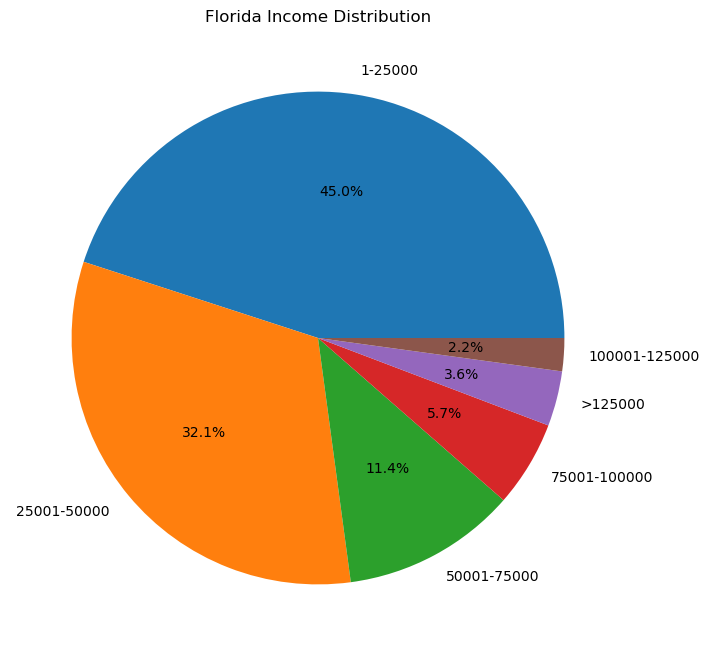

1-25000          985912
25001-50000      704029
50001-75000      250647
75001-100000     124003
>125000           79034
100001-125000     47479
Name: income_range, dtype: int64

In [15]:
# Based on the simulated data from before, we will categorize the gross income into three ranges and count them

# Define the ranges
ranges = [0, 25000, 50000, 75000, 100000, 125000 ,float('inf')]
range_labels = ['1-25000', '25001-50000', '50001-75000','75001-100000','100001-125000','>125000']

# Use pd.cut to categorize the data
clean_FL['income_range'] = pd.cut(clean_FL['grossIncome'], bins=ranges, labels=range_labels)

# Count the number of occurrences in each range
income_distribution = clean_FL['income_range'].value_counts()

# Plotting the proportion of each range as a pie chart
plt.figure(figsize=(8, 8))
income_distribution.plot.pie(autopct='%1.1f%%')
plt.title('Florida Income Distribution')
plt.ylabel('')  # Hiding the y-label as it's not needed in pie charts
plt.show()

income_distribution

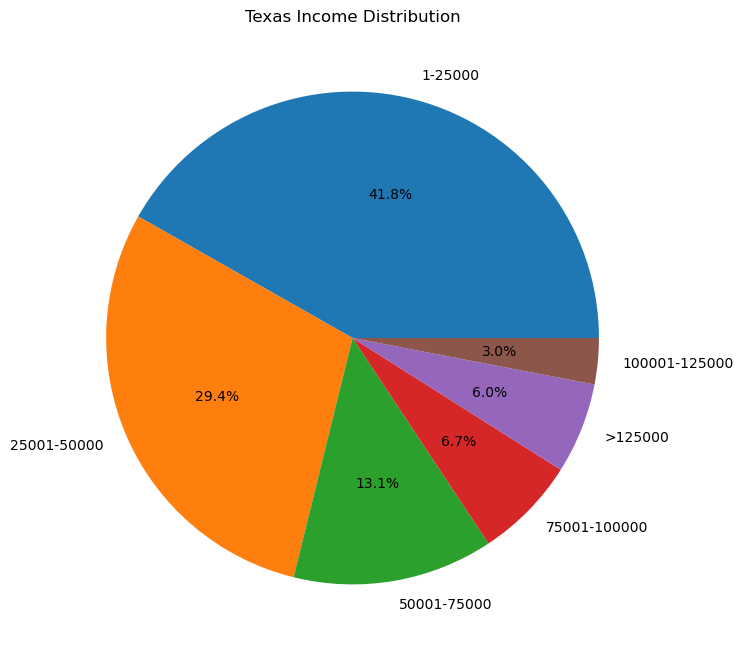

1-25000          441005
25001-50000      309872
50001-75000      138711
75001-100000      70902
>125000           62860
100001-125000     31896
Name: income_range, dtype: int64

In [16]:
# Based on the simulated data from before, we will categorize the gross income into three ranges and count them

# Define the ranges
ranges = [0, 25000, 50000, 75000, 100000, 125000 ,float('inf')]
range_labels = ['1-25000', '25001-50000', '50001-75000','75001-100000','100001-125000','>125000']

# Use pd.cut to categorize the data
clean_TX['income_range'] = pd.cut(clean_TX['grossIncome'], bins=ranges, labels=range_labels)

# Count the number of occurrences in each range
income_distribution = clean_TX['income_range'].value_counts()

# Plotting the proportion of each range as a pie chart
plt.figure(figsize=(8, 8))
income_distribution.plot.pie(autopct='%1.1f%%')
plt.title('Texas Income Distribution')
plt.ylabel('')  # Hiding the y-label as it's not needed in pie charts
plt.show()

income_distribution

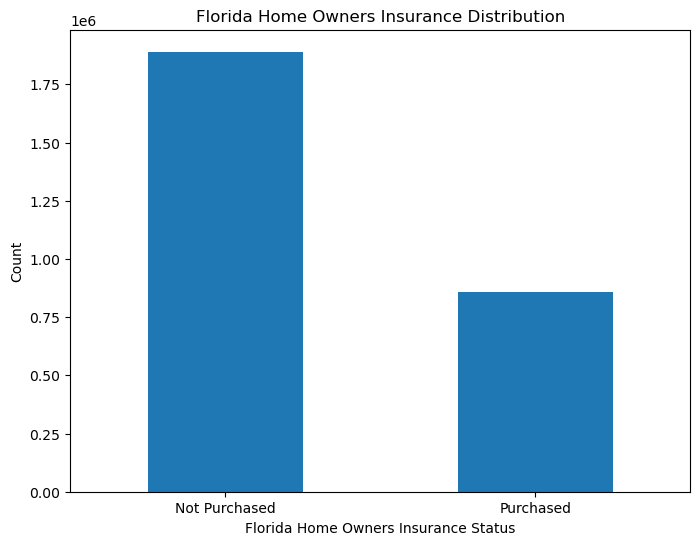

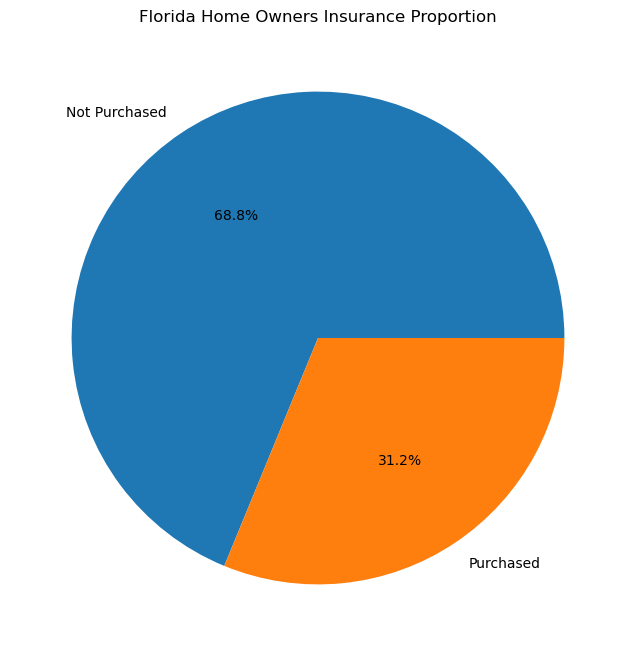

(0    1890125
 1     857581
 Name: homeOwnersInsurance, dtype: int64,
 0    68.789201
 1    31.210799
 Name: homeOwnersInsurance, dtype: float64)

In [17]:
# Since the 'homeOwnersInsurance' column is not present in the data we created,
# we will add it to the DataFrame for the purpose of this analysis.

# Count the number of occurrences of each insurance status
insurance_distribution = clean_FL['homeOwnersInsurance'].value_counts()

# Calculate the proportion of each insurance status
insurance_proportion = (insurance_distribution / insurance_distribution.sum()) * 100

# Plotting the proportion of insurance status as a bar chart
plt.figure(figsize=(8, 6))
insurance_distribution.plot.bar()
plt.title('Florida Home Owners Insurance Distribution')
plt.xlabel('Florida Home Owners Insurance Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Purchased', 'Purchased'], rotation=0)  # Set custom labels
plt.show()

# Plotting the proportion of insurance status as a pie chart
plt.figure(figsize=(8, 8))
insurance_distribution.plot.pie(labels=['Not Purchased', 'Purchased'], autopct='%1.1f%%')
plt.title('Florida Home Owners Insurance Proportion')
plt.ylabel('')  # Hiding the y-label as it's not needed in pie charts
plt.show()

insurance_distribution, insurance_proportion

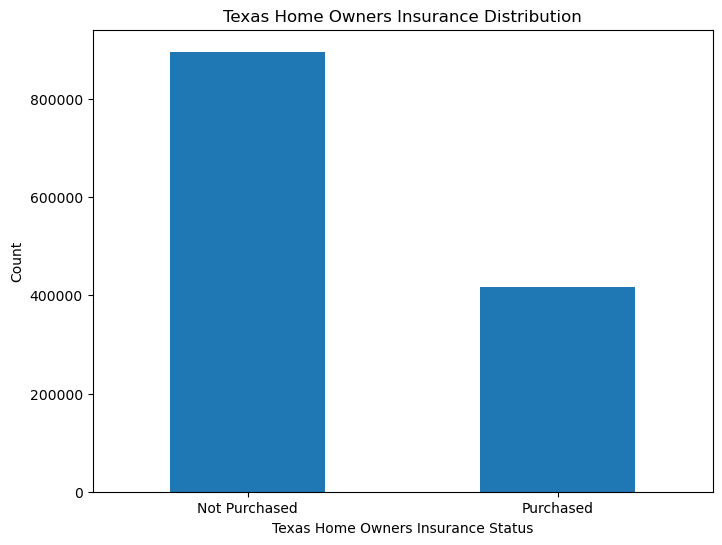

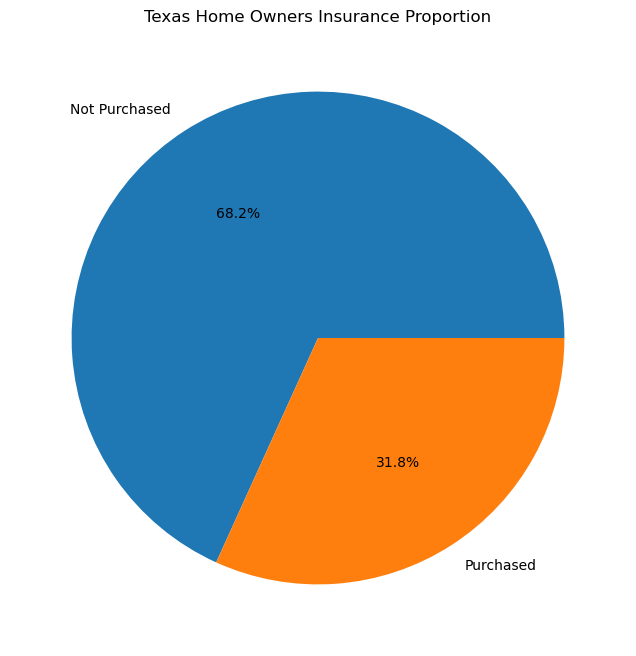

(0    895959
 1    417383
 Name: homeOwnersInsurance, dtype: int64,
 0    68.219778
 1    31.780222
 Name: homeOwnersInsurance, dtype: float64)

In [18]:

# Count the number of occurrences of each insurance status
insurance_distribution = clean_TX['homeOwnersInsurance'].value_counts()

# Calculate the proportion of each insurance status
insurance_proportion = (insurance_distribution / insurance_distribution.sum()) * 100

# Plotting the proportion of insurance status as a bar chart
plt.figure(figsize=(8, 6))
insurance_distribution.plot.bar()
plt.title('Texas Home Owners Insurance Distribution')
plt.xlabel('Texas Home Owners Insurance Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Purchased', 'Purchased'], rotation=0)  # Set custom labels
plt.show()

# Plotting the proportion of insurance status as a pie chart
plt.figure(figsize=(8, 8))
insurance_distribution.plot.pie(labels=['Not Purchased', 'Purchased'], autopct='%1.1f%%')
plt.title('Texas Home Owners Insurance Proportion')
plt.ylabel('')  # Hiding the y-label as it's not needed in pie charts
plt.show()

insurance_distribution, insurance_proportion

### Is there exist logistic relationship between gross income and weather to buy a insurance?

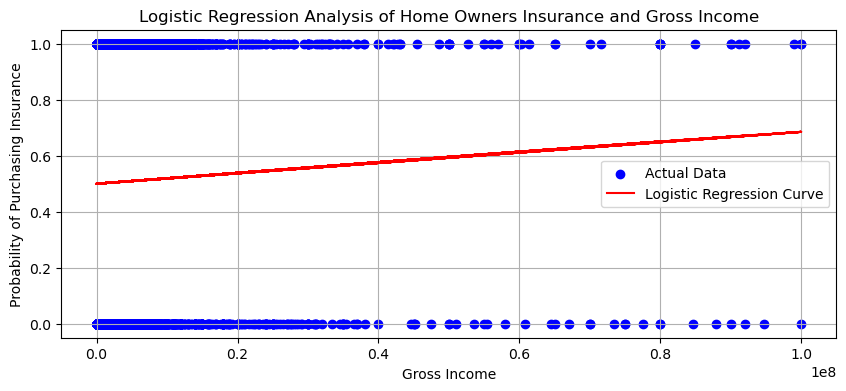

('              precision    recall  f1-score   support\n\n           0       0.71      0.02      0.03   1500821\n           1       0.33      0.99      0.49    721948\n\n    accuracy                           0.33   2222769\n   macro avg       0.52      0.50      0.26   2222769\nweighted avg       0.59      0.33      0.18   2222769\n',
 array([[  22517, 1478304],
        [   9148,  712800]]))

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Prepare the dataset for logistic regression
# We need to ensure there are no NaN values for 'grossIncome' and 'homeOwnersInsurance'
clean_FL = clean_FL.dropna(subset=['grossIncome', 'homeOwnersInsurance'])

# Reshape the data to fit the model
X = clean_FL['grossIncome'].values.reshape(-1, 1)  # Features (independent variable)
y = clean_FL['homeOwnersInsurance'].values  # Target (dependent variable)

# Create and fit the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X, y)

# Predicting the probabilities of purchasing insurance
y_pred_prob = logistic_model.predict_proba(X)[:, 1]

# Calculating the classification report
y_pred = logistic_model.predict(X)
class_report = classification_report(y, y_pred)

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

# Plotting the actual data points and logistic regression curve
plt.figure(figsize=(10, 4))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred_prob, color='red', label='Logistic Regression Curve')
plt.title('Logistic Regression Analysis of Home Owners Insurance and Gross Income')
plt.xlabel('Gross Income')
plt.ylabel('Probability of Purchasing Insurance')
plt.legend()
plt.grid(True)
plt.show()

class_report, conf_matrix


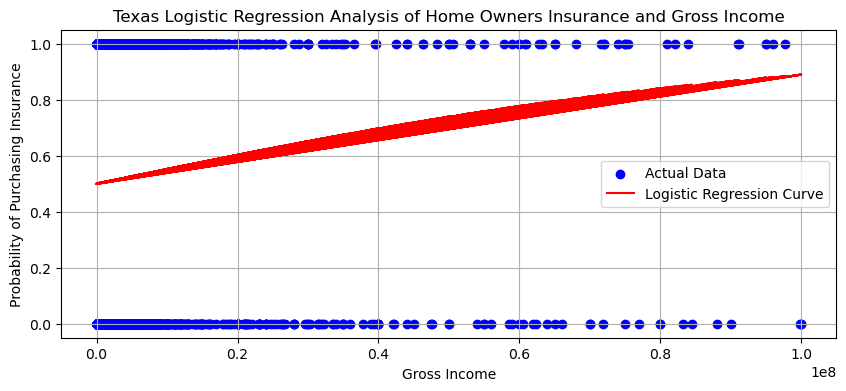

('              precision    recall  f1-score   support\n\n           0       0.73      0.02      0.04    720845\n           1       0.33      0.98      0.50    355880\n\n    accuracy                           0.34   1076725\n   macro avg       0.53      0.50      0.27   1076725\nweighted avg       0.60      0.34      0.19   1076725\n',
 array([[ 15620, 705225],
        [  5859, 350021]]))

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Prepare the dataset for logistic regression
# We need to ensure there are no NaN values for 'grossIncome' and 'homeOwnersInsurance'
clean_TX = clean_TX.dropna(subset=['grossIncome', 'homeOwnersInsurance'])

# Reshape the data to fit the model
X = clean_TX['grossIncome'].values.reshape(-1, 1)  # Features (independent variable)
y = clean_TX['homeOwnersInsurance'].values  # Target (dependent variable)

# Create and fit the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X, y)

# Predicting the probabilities of purchasing insurance
y_pred_prob = logistic_model.predict_proba(X)[:, 1]

# Calculating the classification report
y_pred = logistic_model.predict(X)
class_report = classification_report(y, y_pred)

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

# Plotting the actual data points and logistic regression curve
plt.figure(figsize=(10, 4))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred_prob, color='red', label='Logistic Regression Curve')
plt.title('Texas Logistic Regression Analysis of Home Owners Insurance and Gross Income')
plt.xlabel('Gross Income')
plt.ylabel('Probability of Purchasing Insurance')
plt.legend()
plt.grid(True)
plt.show()

class_report, conf_matrix


Same as the plot based on the data of Florida. we can observe that as total income increases, the probability of purchasing insurance seems to increase, which is reflected by the logistic regression curve. Although most actual data points show a probability of 0 or 1. the regression curve provides an overall trend of the probability as income increases.

Overall, while the logistic regression curve shows a possible positive relationship between income and the probability of purchasing insurance, these two images is not sufficient to conclude a strong logistic relationship due to the extreme distribution of the data points. A more comprehensive statistical analysis needs to consider additional variables, do hypothesis testing and calculate p-values. Only in this way we can have a more accurate conclusions

## 2. The relationship between 'totalApprovedIhpAmount' (total subsidy), namely 'rentalAmount' (rental subsidy), 'otherNeedsAmount' (other need subsidy), 'repairReplaceAmount' (resettlement subsidy)

There are three categories in 'totalApprovedIhpAmount' (total subsidy), namely 'rentalAmount' (rental subsidy), 'otherNeedsAmount' (other need subsidy), 'repairReplaceAmount' (resettlement subsidy) Is there a linear relationship between them?

### renter

In [22]:
import pandas as pd

# Load the CSV file
file_path = 'HousingAssistanceRenters.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

/var/folders/vq/q7gqpwcx7hv4c3d6f0b3zk500000gn/T/ipykernel_65884/293883917.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,disasterNumber,state,county,city,zipCode,validRegistrations,totalInspected,totalInspectedWithNoDamage,totalWithModerateDamage,totalWithMajorDamage,...,approvedForFemaAssistance,totalApprovedIhpAmount,repairReplaceAmount,rentalAmount,otherNeedsAmount,approvedBetween1And10000,approvedBetween10001And25000,approvedBetween25001AndMax,totalMaxGrants,id
0,1439,TX,Harris (County),BEAUMONT,70005,1,0,1,0,0,...,0,0.00,0.0,0.0,0.00,0,0,0,0,201e2cb6-c8ee-42ae-ac9c-4a38a5b3edb4
1,1439,TX,Walker (County),MIDWAY,75852,1,1,1,0,0,...,0,0.00,0.0,0.0,0.00,0,0,0,0,d7bb630c-db75-455a-aeaf-185f621a6bf5
2,1439,TX,Walker (County),TRINITY,75862,2,2,2,0,0,...,1,9636.77,0.0,846.0,8790.77,1,0,0,0,88a1f5ec-822e-4a90-9ffd-6a2030551643
3,1439,TX,Jasper (County),JASPER,75951,36,35,36,0,0,...,10,13541.04,0.0,2886.0,10655.04,10,0,0,0,fc7f287a-252f-4f08-b0d9-e03b2993b278
4,1439,TX,Harris (County),HOUSTON,77002,1,1,1,0,0,...,1,3855.80,0.0,0.0,3855.80,1,0,0,0,8bcae5f6-db9a-47bf-88d3-8972dae2f287


In [23]:
# Calculate basic statistics for totalApprovedIhpAmount
total_approved_stats = data['totalApprovedIhpAmount'].describe()

# Calculate correlations between totalApprovedIhpAmount and other amounts
correlations = data[['totalApprovedIhpAmount', 'rentalAmount', 'otherNeedsAmount', 'repairReplaceAmount']].corr()

# Return the basic statistics and correlations
total_approved_stats, correlations

(count    1.256350e+05
 mean     1.013163e+05
 std      1.837445e+06
 min      0.000000e+00
 25%      0.000000e+00
 50%      2.218000e+03
 75%      1.512388e+04
 max      2.865478e+08
 Name: totalApprovedIhpAmount, dtype: float64,
                         totalApprovedIhpAmount  rentalAmount  \
 totalApprovedIhpAmount                1.000000      0.985301   
 rentalAmount                          0.985301      1.000000   
 otherNeedsAmount                      0.969921      0.926874   
 repairReplaceAmount                   0.852965      0.826682   
 
                         otherNeedsAmount  repairReplaceAmount  
 totalApprovedIhpAmount          0.969921             0.852965  
 rentalAmount                    0.926874             0.826682  
 otherNeedsAmount                1.000000             0.864624  
 repairReplaceAmount             0.864624             1.000000  )

### Statistical analysis（renter）

The correlation coefficient between rent (rentalAmount) and the total amount of compensation is 0.985, indicating that there is a very strong positive correlation between these two. The correlation coefficient between the otherNeedsAmount and the total compensation amount is 0.970, which also shows a very strong positive correlation. The correlation coefficient between the resettlement fee (repairReplaceAmount) and the total amount of compensation is 0.853, indicating a strong positive correlation, but relative to the rent and other demand amounts, its correlation is weak. Based on these data, we can conclude that the correlation between rent (rentalAmount) and the total amount of compensation is the highest, followed closely by the remaining demand amount (otherNeedsAmount), while the resettlement fee (repairReplaceAmount) is also positively correlated with the total amount of compensation. Correlated, but the correlation is weaker than the previous two.

/var/folders/vq/q7gqpwcx7hv4c3d6f0b3zk500000gn/T/ipykernel_65884/1401675162.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  renters_data = pd.read_csv(renters_file_path)


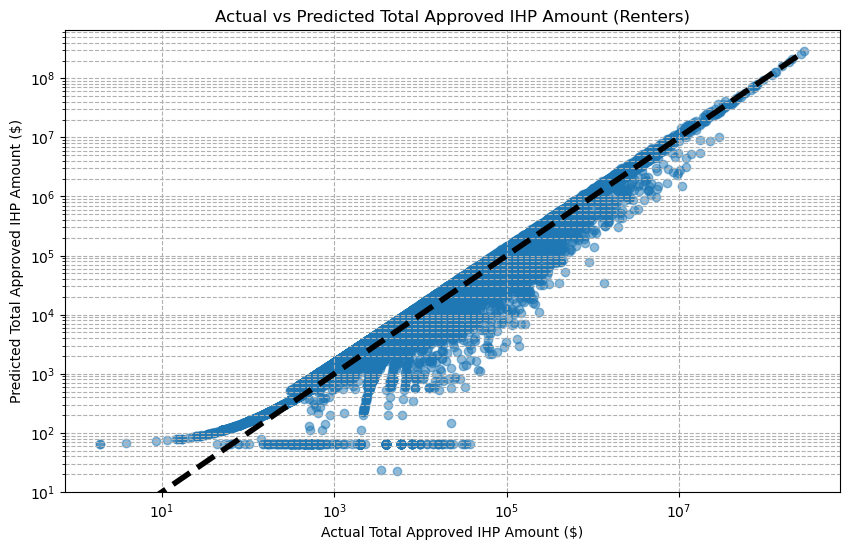

(                     Coefficient
 rentalAmount            1.476996
 otherNeedsAmount        0.920202
 repairReplaceAmount    -2.158532,
 0.9936165427333493)

In [25]:
from sklearn.linear_model import LinearRegression
# We will use the previously loaded data for renters to fit a linear regression model and plot the fitting

# Load the newly uploaded CSV file for Housing Assistance for Renters
renters_file_path = 'HousingAssistanceRenters.csv'
renters_data = pd.read_csv(renters_file_path)

# Prepare the data for linear regression model
# We will predict totalApprovedIhpAmount using rentalAmount, otherNeedsAmount, and repairReplaceAmount
X_renters = renters_data[['rentalAmount', 'otherNeedsAmount', 'repairReplaceAmount']]
y_renters = renters_data['totalApprovedIhpAmount']

# Fit the linear regression model
model_renters = LinearRegression()
model_renters.fit(X_renters, y_renters)

# Predict the values for plotting
y_renters_pred = model_renters.predict(X_renters)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_renters, y_renters_pred, alpha=0.5)
plt.title('Actual vs Predicted Total Approved IHP Amount (Renters)')
plt.xlabel('Actual Total Approved IHP Amount ($)')
plt.ylabel('Predicted Total Approved IHP Amount ($)')
plt.xscale('log')
plt.yscale('log')
plt.plot([y_renters.min(), y_renters.max()], [y_renters.min(), y_renters.max()], 'k--', lw=4)
plt.grid(True, which="both", ls="--")
plt.show()

# Return the coefficients from the model
coefficients_renters = model_renters.coef_
coeff_df_renters = pd.DataFrame(coefficients_renters, X_renters.columns, columns=['Coefficient'])

# Calculate the R-squared value for renters
r_squared_renters = model_renters.score(X_renters, y_renters)

coeff_df_renters, r_squared_renters

The linear regression model fits the relationship between totalApprovedIhpAmount (total compensation amount) and rentalAmount (rent), otherNeedsAmount (remaining demand amount), and repairReplaceAmount (resettlement fee), and obtains the following coefficients:

The coefficient of rent (rentalAmount) is 1.477 The coefficient of otherNeedsAmount is 0.920 The coefficient of replacement fee (repairReplaceAmount) is -2.159 These coefficients indicate that rent and remaining demand amounts have a positive impact on total compensation, while the coefficient for resettlement payments is negative, possibly due to multicollinearity or other statistical anomalies in the data. Theoretically, the negative coefficient of resettlement fees in this model is unexpected because we expect resettlement fees to make a positive contribution to the total amount of compensation. However, due to the particularity of the data, it may be more difficult for tenants to apply for resettlement fees because they are not the real owners of the house.

The R-squared (coefficient of determination) value of this model is 0.994, indicating that the model can explain 99.4% of the variation in the total amount of compensation. This is a very high fit, indicating that the model fits the data very well.

Overall, this model shows that, statistically at least, the rent and remaining demand amounts are strongly correlated with the total amount of compensation, while the negative coefficient of the resettlement fee requires further analysis to explain.

### owner

In [26]:
# Load the newly uploaded CSV file for Housing Assistance for Owners
owners_file_path = 'HousingAssistanceOwners.csv'
owners_data = pd.read_csv(owners_file_path)

# Display the first few rows of the dataframe to understand its structure
owners_data.head()

/var/folders/vq/q7gqpwcx7hv4c3d6f0b3zk500000gn/T/ipykernel_65884/2184108217.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  owners_data = pd.read_csv(owners_file_path)


,disasterNumber,state,county,city,zipCode,validRegistrations,averageFemaInspectedDamage,totalInspected,totalDamage,noFemaInspectedDamage,...,approvedForFemaAssistance,totalApprovedIhpAmount,repairReplaceAmount,rentalAmount,otherNeedsAmount,approvedBetween1And10000,approvedBetween10001And25000,approvedBetween25001AndMax,totalMaxGrants,id
0,1439,TX,Aransas (County),ARANSAS PASS,78335,4,1345.01,3,5380.02,0,...,3,5915.91,3573.02,970.0,1372.89,3,0,0,0,1160f71b-7840-4ebc-91ce-82d9799497fe
1,1439,TX,Aransas (County),ARANSAS PASS,78336,68,3082.82,63,209632.06,4,...,54,180717.57,131097.36,23946.0,25674.21,27,26,1,0,3386035c-108a-4e25-8a6a-b2188a011150
2,1439,TX,Aransas (County),FULTON,78358,20,4722.34,18,94446.72,0,...,17,94240.88,58754.70,6784.0,28702.18,3,11,3,0,0202ee93-1f2f-4172-8529-b8b197c4d71d
3,1439,TX,Aransas (County),FULTON,78381,1,2578.30,1,2578.30,0,...,1,3304.30,1407.96,726.0,1170.34,1,0,0,0,0d1cc693-71af-4be0-b5e3-9f802aa91da0
4,1439,TX,Aransas (County),ROCKPORT,78331,1,0.00,0,0.00,0,...,0,0.00,0.00,0.0,0.00,0,0,0,0,4a805139-fd02-4e7b-b30f-e6c6f7dfbddb


### Statistical analysis

In [27]:
# Calculate basic statistics for totalApprovedIhpAmount for owners
owners_total_approved_stats = owners_data['totalApprovedIhpAmount'].describe()

# Calculate correlations between totalApprovedIhpAmount and other amounts for owners
owners_correlations = owners_data[['totalApprovedIhpAmount', 'rentalAmount', 'otherNeedsAmount', 'repairReplaceAmount']].corr()

# Return the basic statistics and correlations for owners data
owners_total_approved_stats, owners_correlations

(count    1.392000e+05
 mean     1.426168e+05
 std      1.419851e+06
 min      0.000000e+00
 25%      0.000000e+00
 50%      3.036995e+03
 75%      2.145376e+04
 max      1.301360e+08
 Name: totalApprovedIhpAmount, dtype: float64,
                         totalApprovedIhpAmount  rentalAmount  \
 totalApprovedIhpAmount                1.000000      0.867433   
 rentalAmount                          0.867433      1.000000   
 otherNeedsAmount                      0.829510      0.666141   
 repairReplaceAmount                   0.868568      0.575258   
 
                         otherNeedsAmount  repairReplaceAmount  
 totalApprovedIhpAmount          0.829510             0.868568  
 rentalAmount                    0.666141             0.575258  
 otherNeedsAmount                1.000000             0.636963  
 repairReplaceAmount             0.636963             1.000000  )

Similar to the housing tenant data, the distribution of total compensation amounts is very wide, with the median being more representative of compensation amounts for most data points than the mean, which is significantly affected by extreme values.

The correlation coefficient between various expenses (rent, remaining needs, resettlement fees) and the total amount of compensation is as follows:

The correlation coefficient between rent (rentalAmount) and the total amount of compensation is 0.867, indicating that there is a very strong positive correlation between the two. The correlation coefficient between the resettlement fee (repairReplaceAmount) and the total amount of compensation is 0.869, which also shows a very strong positive correlation. The correlation coefficient between the remaining demand amount (otherNeedsAmount) and the total amount of compensation is 0.830, indicating a strong positive correlation, but relative to rent and placement fees, its correlation is weaker. For the house owner data, the correlations between rent and resettlement fees and the total amount of compensation are very close, showing strong positive correlations. This is slightly different from the results of the analysis of tenant data, where rents have the strongest correlation with total compensation amounts. This analysis reveals subtle differences between different types of assistance (owner vs. tenant).

### Statistical analysis with fit a linear regression model (owner)

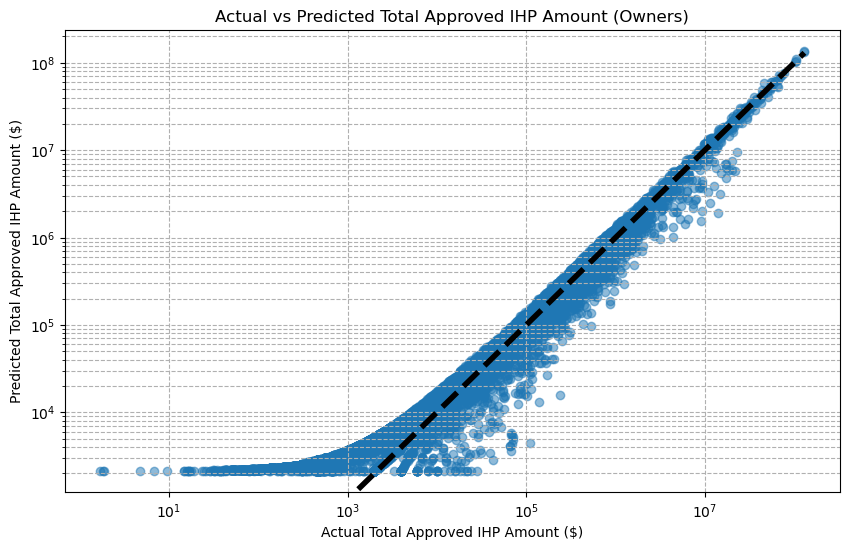

(                     Coefficient
 rentalAmount            1.523444
 otherNeedsAmount        1.140971
 repairReplaceAmount     0.873941,
 0.9836065719308886)

In [28]:
# We have already loaded the data for owners and renters before. 
# Now we will fit a linear regression model to the owners data and plot the fitting.

# Prepare the data for linear regression model for owners
X_owners = owners_data[['rentalAmount', 'otherNeedsAmount', 'repairReplaceAmount']]
y_owners = owners_data['totalApprovedIhpAmount']

# Fit the linear regression model for owners
model_owners = LinearRegression()
model_owners.fit(X_owners, y_owners)

# Predict the values for plotting for owners
y_owners_pred = model_owners.predict(X_owners)

# Plot the actual vs predicted values for owners
plt.figure(figsize=(10, 6))
plt.scatter(y_owners, y_owners_pred, alpha=0.5)
plt.title('Actual vs Predicted Total Approved IHP Amount (Owners)')
plt.xlabel('Actual Total Approved IHP Amount ($)')
plt.ylabel('Predicted Total Approved IHP Amount ($)')
plt.xscale('log')
plt.yscale('log')
plt.plot([y_owners.min(), y_owners.max()], [y_owners.min(), y_owners.max()], 'k--', lw=4)
plt.grid(True, which="both", ls="--")
plt.show()

# Return the coefficients from the model for owners
coefficients_owners = model_owners.coef_
coeff_df_owners = pd.DataFrame(coefficients_owners, X_owners.columns, columns=['Coefficient'])

# Calculate the R-squared value for owners
r_squared_owners = model_owners.score(X_owners, y_owners)

coeff_df_owners, r_squared_owners

For the homeowners data set, the coefficients of the linear regression model are as follows:

The coefficient of rent (rentalAmount) is 1.523 The coefficient of otherNeedsAmount is 1.141 The coefficient of replacement fee (repairReplaceAmount) is 0.874 (significantly different from renter’s data) This means that rent has the greatest impact among all variables on the total amount of compensation, followed by the remaining demand amount, and then resettlement fees.

The R-squared (coefficient of determination) value of the model is 0.984, indicating that the model can explain 98.4% of the variation in the total amount of compensation. This shows that our model is a good fit for this batch of data.

In the chart, we show the relationship between the actual totalApprovedIhpAmount (actual total compensation amount) and the model-predicted totalApprovedIhpAmount (predicted total compensation amount). Due to the very wide range of the data, a logarithmic scale was used. The points on the graph represent each observation, and the straight line represents a perfect prediction. The closer the points are to the straight line, the more accurate the prediction.

These results show that the linear regression model is an effective tool for analyzing the relationship between the total amount of compensation and rent, remaining needs, and resettlement fees. Rent has the strongest correlation with the total amount of compensation, and the remaining demand amounts and resettlement fees also have a significant impact on the total amount of compensation.

### Is there a linear relationship between totalDamage and totalApprovedIhpAmount?

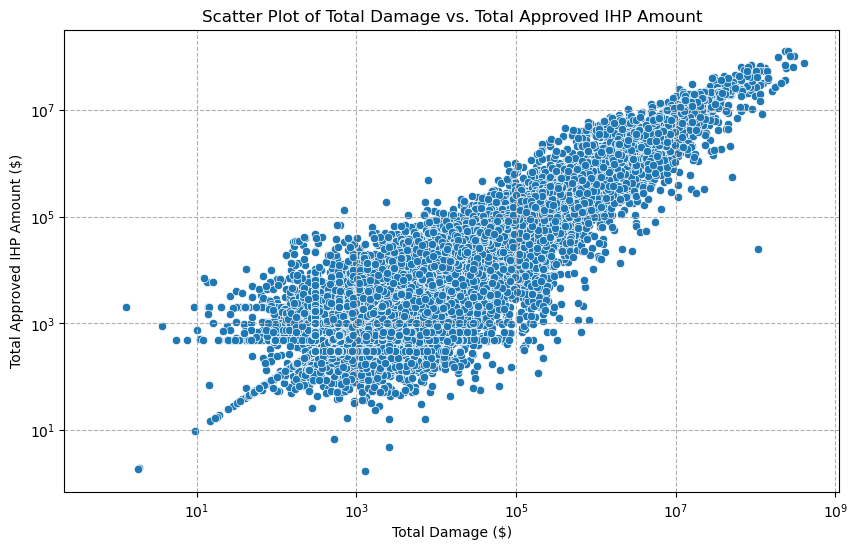

,totalDamage,totalApprovedIhpAmount
totalDamage,1.000000,0.860347
totalApprovedIhpAmount,0.860347,1.000000


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# We will use the previously loaded data for owners to analyze the relationship between totalDamage and totalApprovedIhpAmount

# Calculate the correlation between totalDamage and totalApprovedIhpAmount
damage_approved_correlation = owners_data[['totalDamage', 'totalApprovedIhpAmount']].corr()

# Scatter plot to show the relationship between totalDamage and totalApprovedIhpAmount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=owners_data, x='totalDamage', y='totalApprovedIhpAmount')
plt.title('Scatter Plot of Total Damage vs. Total Approved IHP Amount')
plt.xlabel('Total Damage ($)')
plt.ylabel('Total Approved IHP Amount ($)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="--")
plt.show()

# Return the correlation value
damage_approved_correlation

According to the analysis, the correlation coefficient between totalDamage (determined loss amount) and totalApprovedIhpAmount (compensation amount) is 0.860, indicating that there is a strong positive correlation between them. This means that as the amount of loss increases, the amount of compensation usually increases as well.

It can be seen from the scatter plot that as the fixed loss amount increases, the compensation amount seems to also increase, but the two are not completely consistent. Since the scatter plot uses a logarithmic scale, we can more clearly see the distribution of data points within different dollar amounts. The scatter distribution in the graph shows that although most of the data points closely surround a line, there are also some points that are far away from the line, which may indicate a weaker relationship between the compensation amount and the loss amount in some cases.

## 3.What are the most affected counties in terms of the number of valid registrations, total inspected properties with major damage, and FEMA assistance approvals?

In [35]:
renters_data_new = pd.read_csv('HousingAssistanceRenters.csv')
owners_data_new = pd.read_csv('HousingAssistanceOwners.csv')
renters_agg = renters_data_new.groupby('county').agg(
    valid_registrations_renters=('validRegistrations', 'sum'),
    major_damage_inspected_renters=('totalWithMajorDamage', 'sum'),
    fema_assistance_approvals_renters=('approvedForFemaAssistance', 'sum')
).reset_index()

owners_agg = owners_data_new.groupby('county').agg(
    valid_registrations_owners=('validRegistrations', 'sum'),
    major_damage_inspected_owners=('femaInspectedDamageGreaterThan30000', 'sum'),  # Adjusted column
    fema_assistance_approvals_owners=('approvedForFemaAssistance', 'sum')
).reset_index()

# Merging the aggregated data for renters and owners on county
combined_agg = pd.merge(renters_agg, owners_agg, on='county', how='outer').fillna(0)

# Adding total columns for each metric to get a combined view
combined_agg['total_valid_registrations'] = combined_agg['valid_registrations_renters'] + combined_agg['valid_registrations_owners']
combined_agg['total_major_damage_inspected'] = combined_agg['major_damage_inspected_renters'] + combined_agg['major_damage_inspected_owners']
combined_agg['total_fema_assistance_approvals'] = combined_agg['fema_assistance_approvals_renters'] + combined_agg['fema_assistance_approvals_owners']

most_affected_by_registrations = combined_agg.sort_values(by='total_valid_registrations', ascending=False).head(10)
most_affected_by_major_damage = combined_agg.sort_values(by='total_major_damage_inspected', ascending=False).head(10)
most_affected_by_fema_approvals = combined_agg.sort_values(by='total_fema_assistance_approvals', ascending=False).head(10)

print("Most Affected Counties by Valid Registrations:\n", most_affected_by_registrations[['county', 'total_valid_registrations']])
print("\nMost Affected Counties by Major Damage:\n", most_affected_by_major_damage[['county', 'total_major_damage_inspected']])
print("\nMost Affected Counties by FEMA Approvals:\n", most_affected_by_fema_approvals[['county', 'total_fema_assistance_approvals']])

/var/folders/vq/q7gqpwcx7hv4c3d6f0b3zk500000gn/T/ipykernel_65884/4273609037.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  renters_data_new = pd.read_csv('HousingAssistanceRenters.csv')
/var/folders/vq/q7gqpwcx7hv4c3d6f0b3zk500000gn/T/ipykernel_65884/4273609037.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  owners_data_new = pd.read_csv('HousingAssistanceOwners.csv')


Most Affected Counties by Valid Registrations:
                    county  total_valid_registrations
772       Harris (County)                  1096194.0
1157  Miami-Dade (County)                   812062.0
1312     Orleans (Parish)                   639889.0
881    Jefferson (Parish)                   598827.0
227      Broward (County)                   559567.0
1308      Orange (County)                   492000.0
1336  Palm Beach (County)                   443550.0
424         Cook (County)                   393119.0
1011         Lee (County)                   373718.0
880    Jefferson (County)                   358362.0

Most Affected Counties by Major Damage:
                          county  total_major_damage_inspected
1011               Lee (County)                       12304.0
772             Harris (County)                       12182.0
1312           Orleans (Parish)                       12068.0
261          Calcasieu (Parish)                        8467.0
1230            N

Counties that appear high in all three rankings, such as Harris County and Orleans Parish, are likely to be those most severely affected by disasters. These counties have not only a high number of individuals and households affected (as shown by valid registrations) but also a significant level of property damage (as indicated by major damage inspections) and a substantial number of FEMA assistance approvals, suggesting a high level of need that is being recognized and met by FEMA.

The correlation can help us understand whether a higher number of valid registrations tends to coincide with a higher number of FEMA assistance approvals, or if the extent of major damage inspections is a good predictor of the level of FEMA assistance provided.

In [36]:
correlation_matrix = combined_agg[
    ['total_valid_registrations', 'total_major_damage_inspected', 'total_fema_assistance_approvals']
].corr()

print(correlation_matrix)

                                 total_valid_registrations  \
total_valid_registrations                         1.000000   
total_major_damage_inspected                      0.661138   
total_fema_assistance_approvals                   0.948890   

                                 total_major_damage_inspected  \
total_valid_registrations                            0.661138   
total_major_damage_inspected                         1.000000   
total_fema_assistance_approvals                      0.674683   

                                 total_fema_assistance_approvals  
total_valid_registrations                               0.948890  
total_major_damage_inspected                            0.674683  
total_fema_assistance_approvals                         1.000000  


Total Valid Registrations and Total FEMA Assistance Approvals: 
    The correlation coefficient is approximately 0.95, indicating a very strong positive correlation.    
    It highlights the effectiveness of the registration process in identifying and providing assistance to those in need.
    
Total Valid Registrations and Total Major Damage Inspected: 
    The correlation coefficient is approximately 0.66, indicating a moderate to strong positive correlation.    
Total Major Damage Inspected and Total FEMA Assistance Approvals: 
    The correlation coefficient is approximately 0.67, indicating a moderate to strong positive correlation.     
The moderate to strong correlations involving major damage inspections suggest that while the physical extent of damage is an important factor in disaster response, it is not the sole determinant of the number of registrations or assistance approvals.

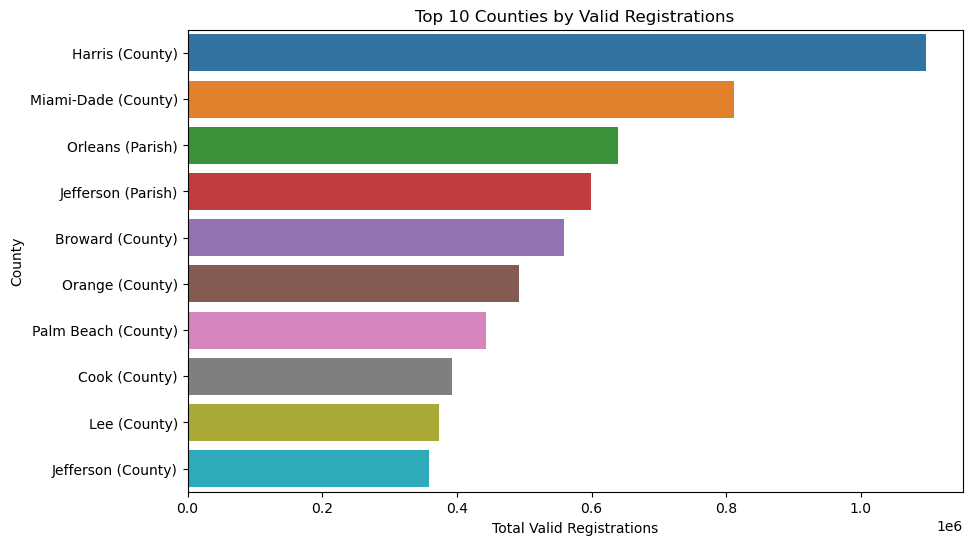

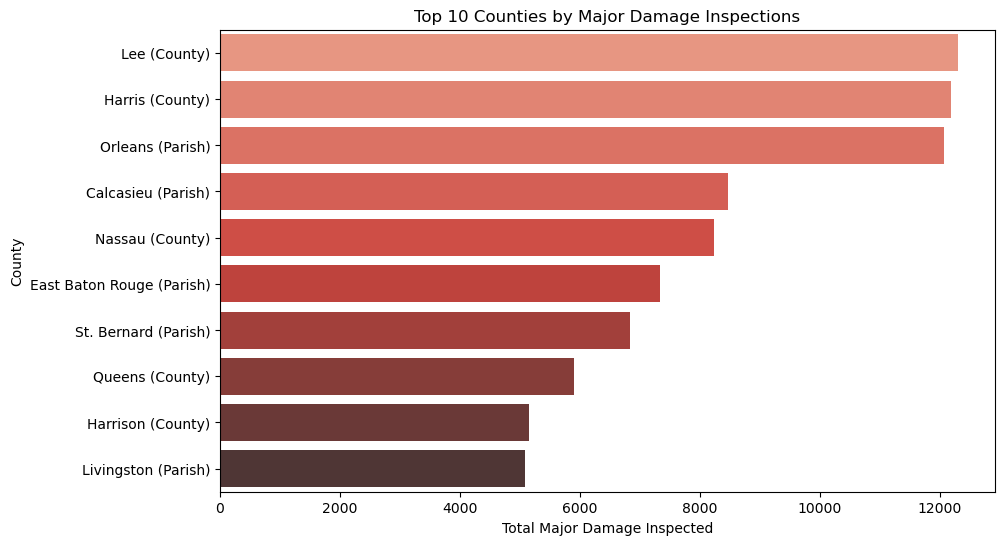

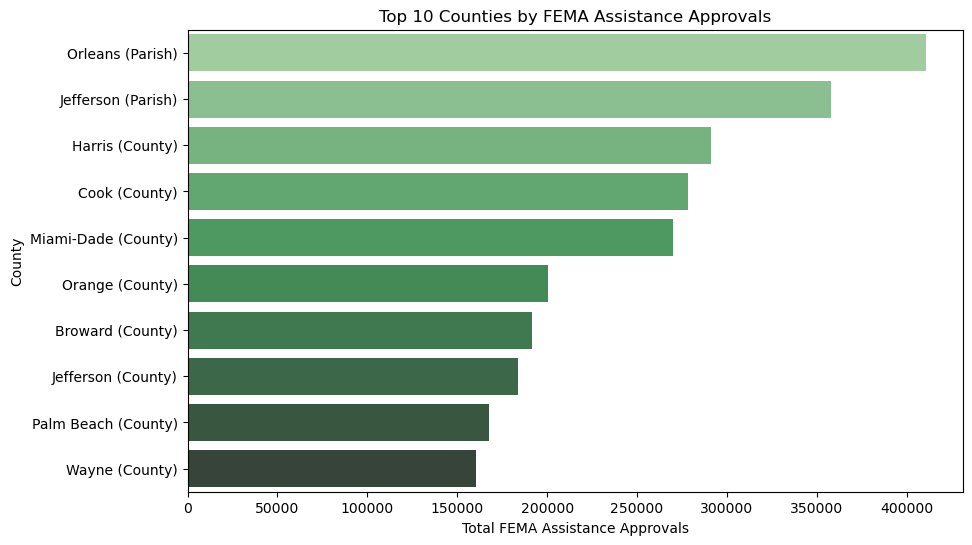

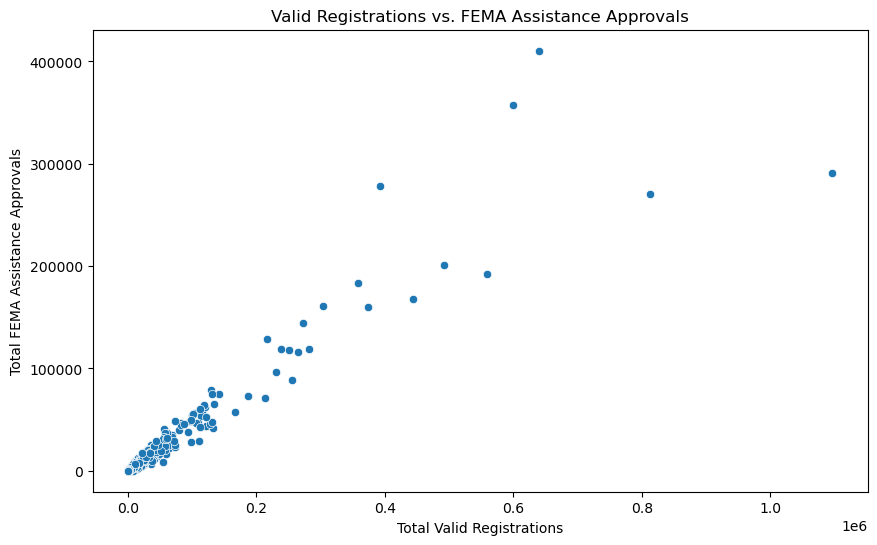

In [37]:
#Bar Plots for the Top 10 Most Affected Counties
plt.figure(figsize=(10, 6))
sns.barplot(x='total_valid_registrations', y='county', data=most_affected_by_registrations)
plt.title('Top 10 Counties by Valid Registrations')
plt.xlabel('Total Valid Registrations')
plt.ylabel('County')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='total_major_damage_inspected', y='county', data=most_affected_by_major_damage.head(10), palette='Reds_d')
plt.title('Top 10 Counties by Major Damage Inspections')
plt.xlabel('Total Major Damage Inspected')
plt.ylabel('County')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='total_fema_assistance_approvals', y='county', data=most_affected_by_fema_approvals.head(10), palette='Greens_d')
plt.title('Top 10 Counties by FEMA Assistance Approvals')
plt.xlabel('Total FEMA Assistance Approvals')
plt.ylabel('County')
plt.show()

#Scatter Plots to Illustrate Correlation between Total Valid Registrations and Total FEMA Assistance Approvals
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_valid_registrations', y='total_fema_assistance_approvals', data=combined_agg)
plt.title('Valid Registrations vs. FEMA Assistance Approvals')
plt.xlabel('Total Valid Registrations')
plt.ylabel('Total FEMA Assistance Approvals')
plt.show()

## 4. The most affected counties in terms of the number of valid registrations and FEMA assistance approvals, and if there are correlation between the number of valid registrations and FEMA assistance approvals, “Reasonableness of FEMA assistance approvals” which is if the county where has more valid registrations can get more FEMA assistance approvals

The question is whether the allocation of government funds for disaster relief is reasonable The parameters used are 'totalApprovedIhpAmount' which isTotal amount approved in dollars under FEMAs IHP program, and ' validRegistrations' which is Count of FEMA registration owners within the state, county, zip where the registration is valid. I would like to use ' validRegistrations' to reflect the severity of a county's disaster, i.e., the more owners registered as being affected by the disaster the more severely the county was affected.

1st step: Rank all counties by the number of 'validRegistrations' to determine the ranking order of the counties affected by the disaster.

2nd step: Rank all counties by 'totalApprovedIhpAmount' to determine how much aid each county received.

3rd step: Correlate the two rankings from the previous two steps and visualize the data.

4th step: Summarize the distribution of aid funds as reasonable.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from google.colab import drive
# drive.mount('/content/drive')
import os
from glob import glob
# os.getcwd()
# glob('/content/drive/MyDrive/*')

In [41]:
housing_data=pd.read_csv('HousingAssistanceOwners.csv')
housing_data

/var/folders/vq/q7gqpwcx7hv4c3d6f0b3zk500000gn/T/ipykernel_65884/2979753845.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  housing_data=pd.read_csv('HousingAssistanceOwners.csv')


,disasterNumber,state,county,city,zipCode,validRegistrations,averageFemaInspectedDamage,totalInspected,totalDamage,noFemaInspectedDamage,...,approvedForFemaAssistance,totalApprovedIhpAmount,repairReplaceAmount,rentalAmount,otherNeedsAmount,approvedBetween1And10000,approvedBetween10001And25000,approvedBetween25001AndMax,totalMaxGrants,id
0,1439,TX,Aransas (County),ARANSAS PASS,78335,4,1345.01,3,5380.02,0,...,3,5915.91,3573.02,970.0,1372.89,3,0,0,0,1160f71b-7840-4ebc-91ce-82d9799497fe
1,1439,TX,Aransas (County),ARANSAS PASS,78336,68,3082.82,63,209632.06,4,...,54,180717.57,131097.36,23946.0,25674.21,27,26,1,0,3386035c-108a-4e25-8a6a-b2188a011150
2,1439,TX,Aransas (County),FULTON,78358,20,4722.34,18,94446.72,0,...,17,94240.88,58754.70,6784.0,28702.18,3,11,3,0,0202ee93-1f2f-4172-8529-b8b197c4d71d
3,1439,TX,Aransas (County),FULTON,78381,1,2578.30,1,2578.30,0,...,1,3304.30,1407.96,726.0,1170.34,1,0,0,0,0d1cc693-71af-4be0-b5e3-9f802aa91da0
4,1439,TX,Aransas (County),ROCKPORT,78331,1,0.00,0,0.00,0,...,0,0.00,0.00,0.0,0.00,0,0,0,0,4a805139-fd02-4e7b-b30f-e6c6f7dfbddb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139195,9808,PA,Allegheny (County),GLENSHAW,15116,1,0.00,0,0.00,0,...,0,0.00,0.00,0.0,0.00,0,0,0,0,8bc98fba-1d5d-4e4b-8dd1-d2a6d9c4bb38
139196,9808,PA,Berks (County),WYOMISSING,19610,1,0.00,0,0.00,0,...,0,0.00,0.00,0.0,0.00,0,0,0,0,eba3c243-70ef-4ebe-8ec4-30874c2d059d
139197,9808,PA,Chester (County),WEST CHESTER,19382,2,0.00,0,0.00,0,...,0,0.00,0.00,0.0,0.00,0,0,0,0,4bc34903-b87f-4ce0-b5d3-e001962bc60e
139198,9808,PA,Schuylkill (County),NEW PHILADELPHIA,17959,1,0.00,0,0.00,0,...,0,0.00,0.00,0.0,0.00,0,0,0,0,364ac914-e69e-4e13-b072-f481f4283413


Rank all counties by the number of 'validRegistrations' to determine the ranking order of the counties affected by the disaster.

In [42]:
# Aggregating the data by county for the sum of valid registrations
aggregated_data = housing_data.groupby('county').agg({
    'validRegistrations': 'sum',
    'totalInspected': 'sum',
    'approvedForFemaAssistance': 'sum'
}).reset_index()

# Sorting the aggregated data by valid registrations to find the top counties
top_valid_registrations = aggregated_data.sort_values(by='validRegistrations', ascending=False)
# Adding a ranking column
top_valid_registrations['Rank'] = range(1, 1800)

# Display the updated DataFrame with the ranking
top_valid_registrations[['Rank', 'county', 'validRegistrations']]

,Rank,county,validRegistrations
696,1,Harris (County),508970
1043,2,Miami-Dade (County),349476
210,3,Broward (County),311273
799,4,Jefferson (Parish),296733
1204,5,Palm Beach (County),268218
...,...,...,...
355,1795,Clinch (County),1
953,1796,Luna (County),1
342,1797,Clare (County),1
335,1798,Cibola (County),1


Rank all counties by 'totalApprovedIhpAmount' to determine how much aid each county received.

In [43]:
# Aggregating the data by county to find the most affected ones based on the totalApprovedIhpAmount
aggregated_data_ihp = housing_data.groupby('county').agg({
    'totalApprovedIhpAmount': 'sum'
}).reset_index()

# Sorting the aggregated data to identify the top counties for totalApprovedIhpAmount
top_ihp_amount = aggregated_data_ihp.sort_values(by='totalApprovedIhpAmount', ascending=False)



# Adding a ranking column
top_ihp_amount['Rank'] = range(1, 1800)

# Display the updated DataFrame with the ranking
top_ihp_amount[['Rank', 'county', 'totalApprovedIhpAmount']]

,Rank,county,totalApprovedIhpAmount
1181,1,Orleans (Parish),9.692899e+08
696,2,Harris (County),7.861638e+08
392,3,Cook (County),6.896142e+08
799,4,Jefferson (Parish),6.208158e+08
910,5,Lee (County),4.819630e+08
...,...,...,...
154,1795,Billings (County),0.000000e+00
702,1796,Haskell (County),0.000000e+00
140,1797,Benzie (County),0.000000e+00
1467,1798,Sibley (County),0.000000e+00


Correlate the two rankings from the previous two steps.

In [44]:
# Aggregating data by county for totalApprovedIhpAmount
total_approved_ihp_amount_agg = housing_data.groupby('county').agg({
    'totalApprovedIhpAmount': 'sum'
}).reset_index()

# Merging this aggregation with the original top_valid_registrations to include totalApprovedIhpAmount
merged_data = top_valid_registrations.merge(total_approved_ihp_amount_agg, on='county')

# Generating rankings based on totalApprovedIhpAmount
merged_data['IhpAmountRank'] = merged_data['totalApprovedIhpAmount'].rank(ascending=False)

# Calculating the correlation coefficient between the two rankings
correlation = merged_data[['Rank', 'IhpAmountRank']].corr().iloc[0, 1]

correlation

0.9664998581830576

Visualize the data

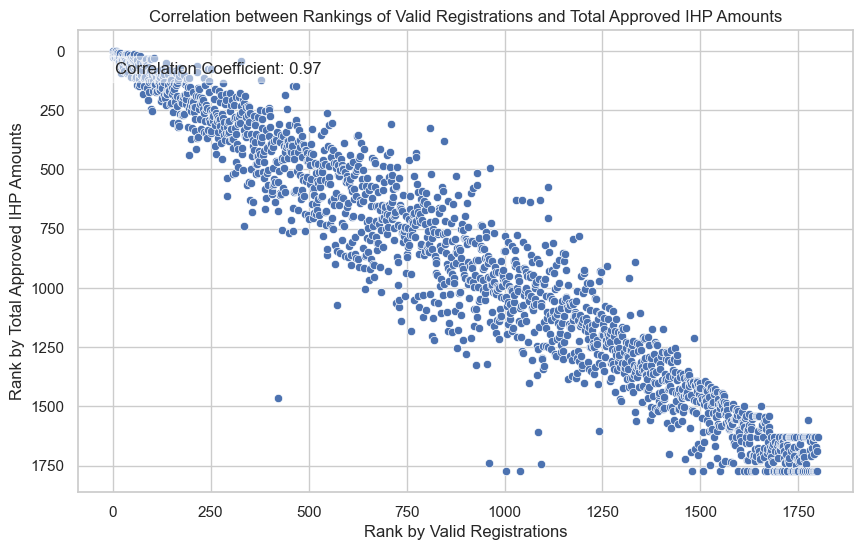

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style of the seaborn
sns.set(style="whitegrid")

# Creating a scatter plot to show the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rank', y='IhpAmountRank', data=merged_data)

plt.title('Correlation between Rankings of Valid Registrations and Total Approved IHP Amounts')
plt.xlabel('Rank by Valid Registrations')
plt.ylabel('Rank by Total Approved IHP Amounts')
plt.gca().invert_yaxis()  # Inverting y-axis to match lower ranks with higher values
plt.text(5, 95, f'Correlation Coefficient: {correlation:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

From the results of the final analysis and the graphs, it can be seen that the total amount approved in dollars under FEMAs IHP program, i.e., the amount of funds approved by the government is highly correlated with the disaster situation in each locality, and the allocation of the government's disaster relief funds is reasonable.

## 5. For both owner and renter, what is the relationship between the number of applications and approvals for fema assistance.

/var/folders/vq/q7gqpwcx7hv4c3d6f0b3zk500000gn/T/ipykernel_65884/2372159315.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("HousingAssistanceRenters.csv")


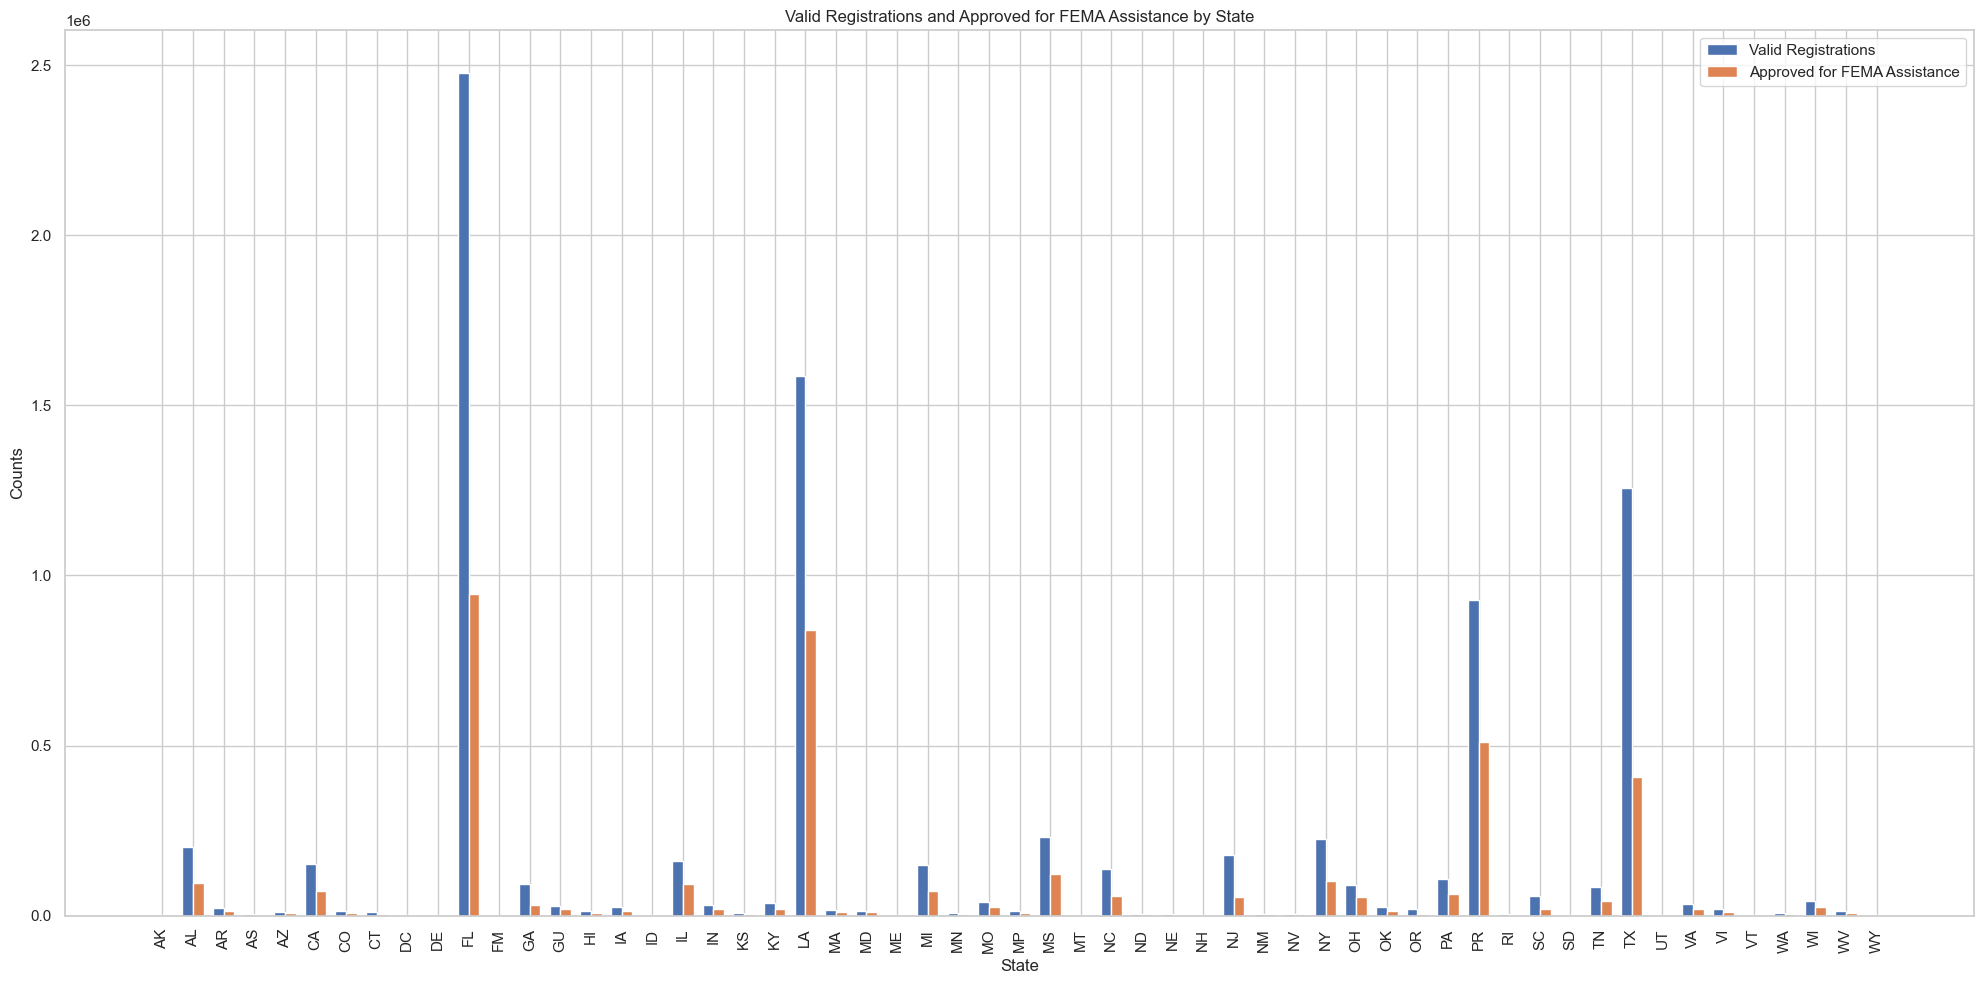

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_csv("HousingAssistanceRenters.csv")

# Calculate totals
valid_Registrations_per_state = data.groupby('state')['validRegistrations'].sum()
approved_for_fema_per_state = data.groupby('state')['approvedForFemaAssistance'].sum()

# Ensure the indices are aligned and data is in the same order
valid_Registrations_per_state = valid_Registrations_per_state.sort_index()
approved_for_fema_per_state = approved_for_fema_per_state.sort_index()

# Number of states
N = len(valid_Registrations_per_state)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(ind - width/2, valid_Registrations_per_state, width, label='Valid Registrations')
rects2 = ax.bar(ind + width/2, approved_for_fema_per_state, width, label='Approved for FEMA Assistance')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('State')
ax.set_ylabel('Counts')
ax.set_title('Valid Registrations and Approved for FEMA Assistance by State')
ax.set_xticks(ind)
ax.set_xticklabels(valid_Registrations_per_state.index, rotation='vertical')
ax.legend()

plt.tight_layout()
plt.show()


This is a chart that records for each state in the United States, the number of renters who applied for FEMA aid and the number of people who were ultimately approved for FEMA aid.

/var/folders/vq/q7gqpwcx7hv4c3d6f0b3zk500000gn/T/ipykernel_65884/1238138559.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("HousingAssistanceOwners.csv")


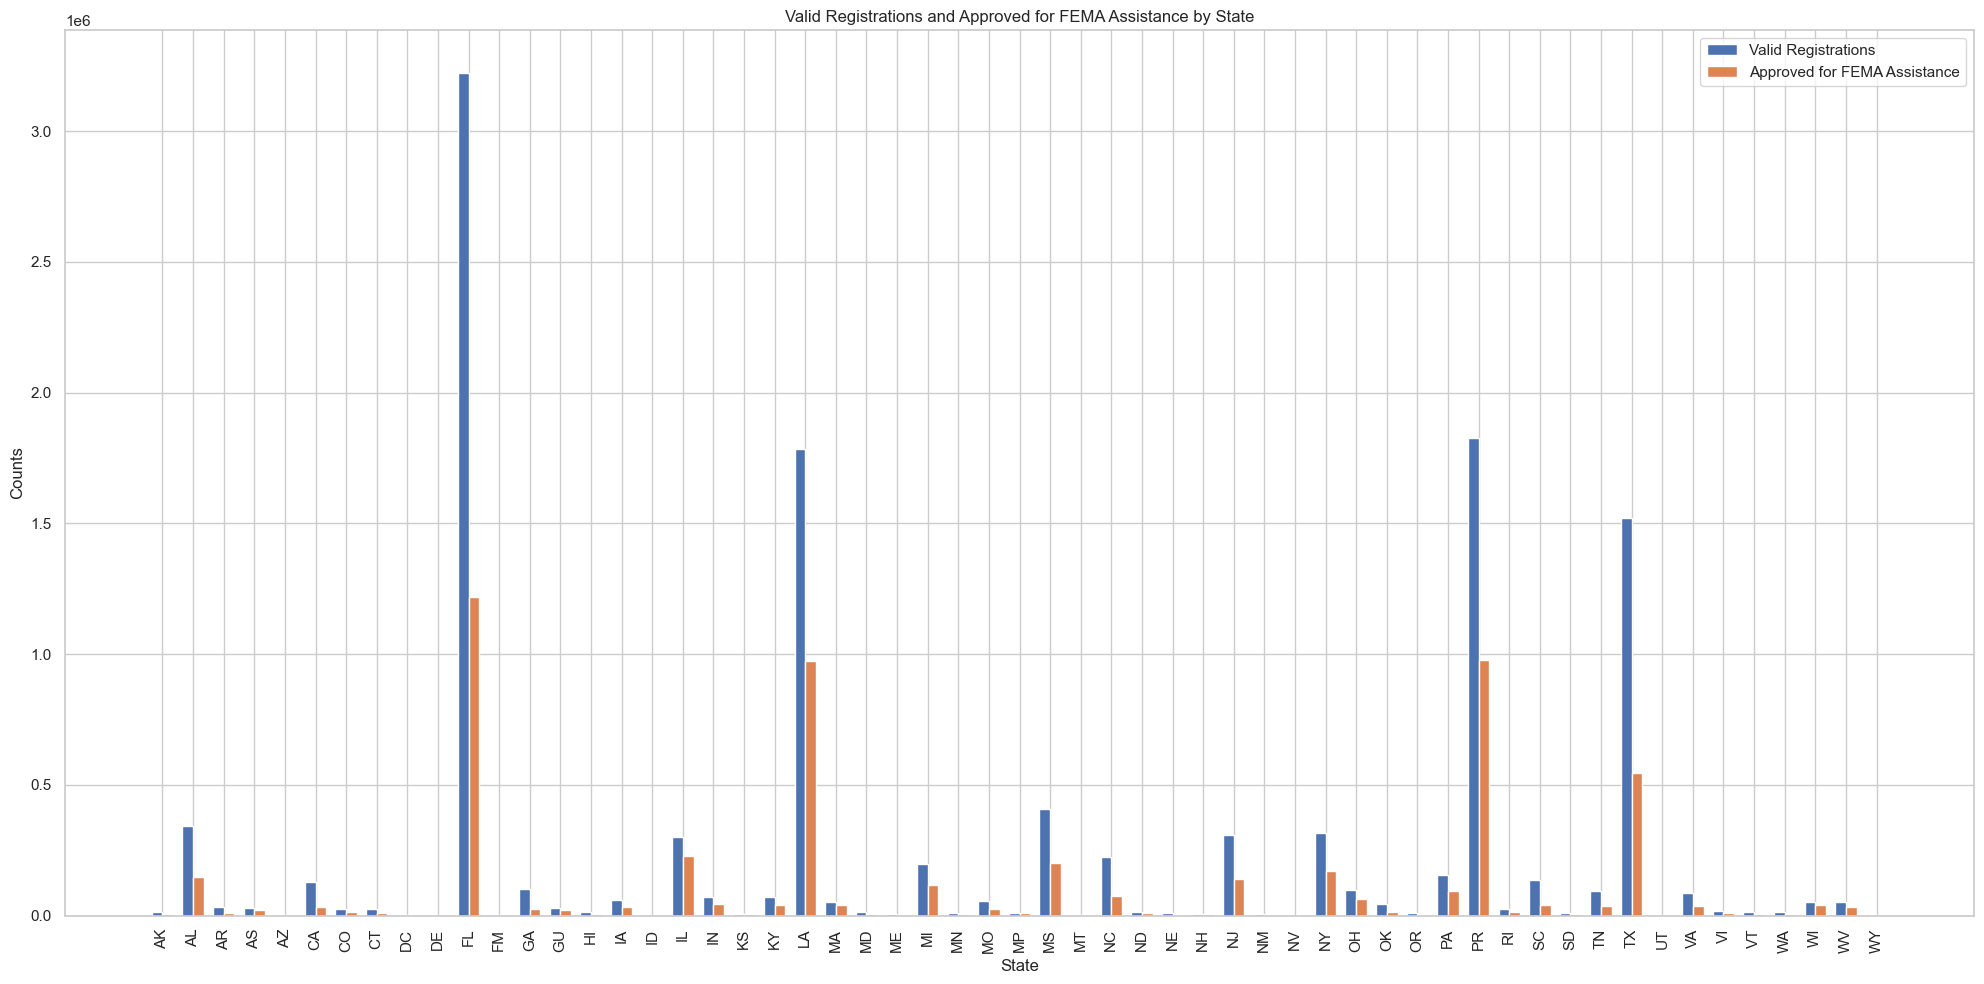

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_csv("HousingAssistanceOwners.csv")

# Calculate totals
valid_Registrations_per_state = data.groupby('state')['validRegistrations'].sum()
approved_for_fema_per_state = data.groupby('state')['approvedForFemaAssistance'].sum()

# Ensure the indices are aligned and data is in the same order
valid_Registrations_per_state = valid_Registrations_per_state.sort_index()
approved_for_fema_per_state = approved_for_fema_per_state.sort_index()

# Number of states
N = len(valid_Registrations_per_state)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(ind - width/2, valid_Registrations_per_state, width, label='Valid Registrations')
rects2 = ax.bar(ind + width/2, approved_for_fema_per_state, width, label='Approved for FEMA Assistance')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('State')
ax.set_ylabel('Counts')
ax.set_title('Valid Registrations and Approved for FEMA Assistance by State')
ax.set_xticks(ind)
ax.set_xticklabels(valid_Registrations_per_state.index, rotation='vertical')
ax.legend()

plt.tight_layout()
plt.show()


This is a chart that records for each state in the United States, the number of owners who applied for FEMA aid and the number of people who were ultimately approved for FEMA aid.

/var/folders/vq/q7gqpwcx7hv4c3d6f0b3zk500000gn/T/ipykernel_65884/3420043655.py:7: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("HousingAssistanceRenters.csv")


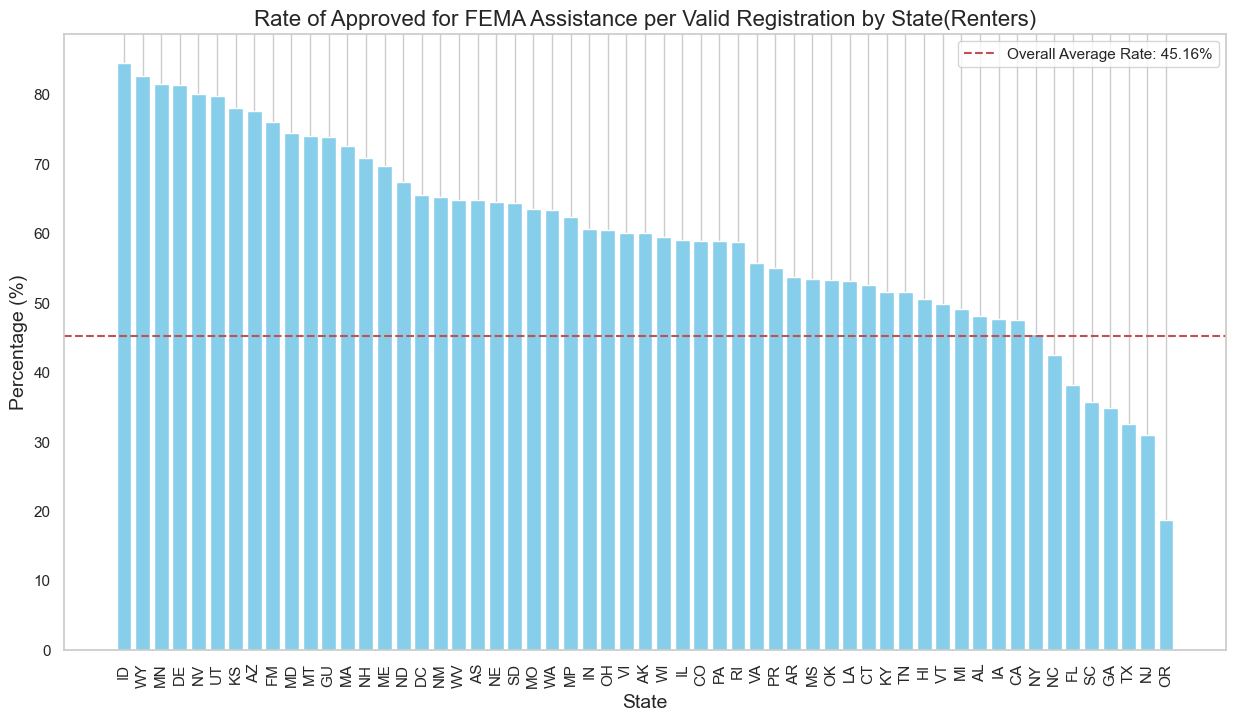

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file to examine its contents
data = pd.read_csv("HousingAssistanceRenters.csv")

# Calculate the rate of approvedForFemaAssistance/validRegistrations for each state
state_rates = data.groupby('state').apply(lambda x: (x['approvedForFemaAssistance'].sum() / x['validRegistrations'].sum()) * 100)

# Sort the rates in descending order
state_rates_sorted = state_rates.sort_values(ascending=False)
# Calculate the overall average rate
overall_average_rate = (data['approvedForFemaAssistance'].sum() / data['validRegistrations'].sum()) * 100

# Re-plot with the overall average rate included
plt.figure(figsize=(15, 8))
plt.bar(state_rates_sorted.index, state_rates_sorted.values, color='skyblue')
plt.axhline(y=overall_average_rate, color='r', linestyle='--', label=f'Overall Average Rate: {overall_average_rate:.2f}%')
plt.xlabel('State', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.title('Rate of Approved for FEMA Assistance per Valid Registration by State(Renters)', fontsize=16)
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis='y')

plt.show()

#Overall Average Rate of Approved for FEMA Assistance per Valid Registration by State(Renters) is 45.16%.

/var/folders/vq/q7gqpwcx7hv4c3d6f0b3zk500000gn/T/ipykernel_65884/1337434805.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("HousingAssistanceOwners.csv")


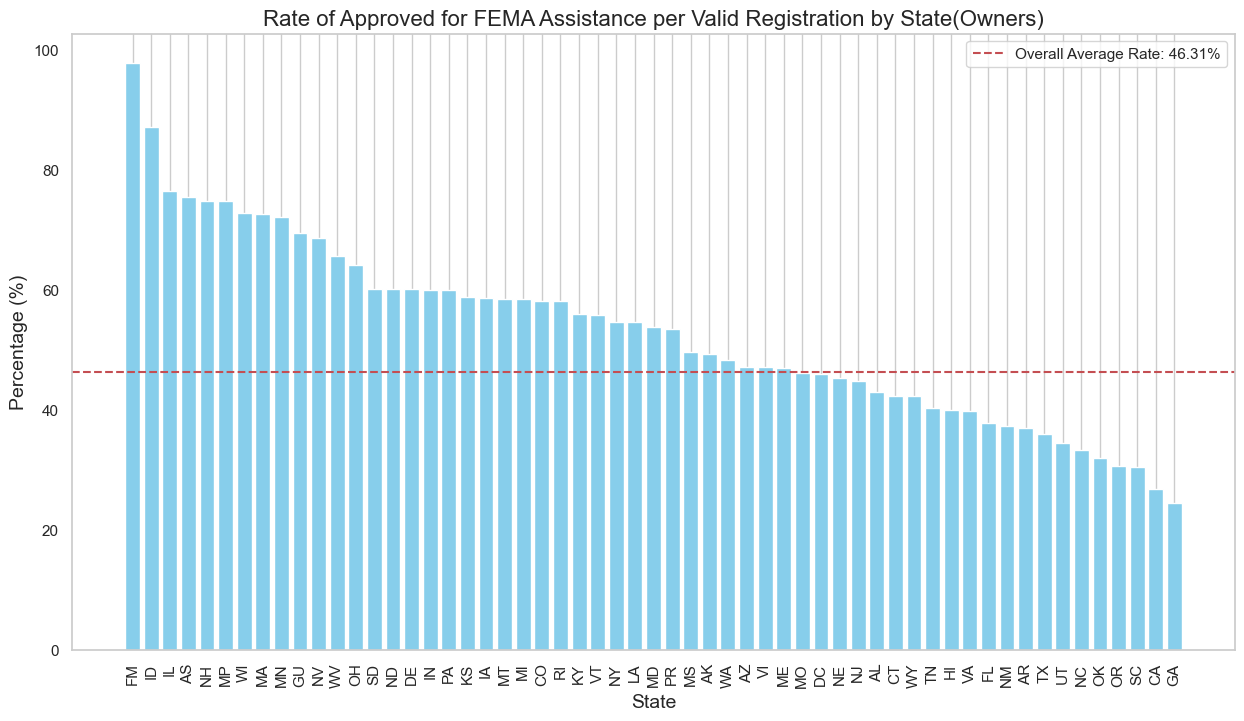

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file to examine its contents
data = pd.read_csv("HousingAssistanceOwners.csv")

# Calculate the rate of approvedForFemaAssistance/validRegistrations for each state
state_rates = data.groupby('state').apply(lambda x: (x['approvedForFemaAssistance'].sum() / x['validRegistrations'].sum()) * 100)

# Sort the rates in descending order
state_rates_sorted = state_rates.sort_values(ascending=False)
# Calculate the overall average rate
overall_average_rate = (data['approvedForFemaAssistance'].sum() / data['validRegistrations'].sum()) * 100

# Re-plot with the overall average rate included
plt.figure(figsize=(15, 8))
plt.bar(state_rates_sorted.index, state_rates_sorted.values, color='skyblue')
plt.axhline(y=overall_average_rate, color='r', linestyle='--', label=f'Overall Average Rate: {overall_average_rate:.2f}%')
plt.xlabel('State', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.title('Rate of Approved for FEMA Assistance per Valid Registration by State(Owners)', fontsize=16)
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis='y')

plt.show()

# Overall Average Rate of Approved for FEMA Assistance per Valid Registration by State(Owners) is 46.31%.


/var/folders/vq/q7gqpwcx7hv4c3d6f0b3zk500000gn/T/ipykernel_65884/1501881461.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data_renters = pd.read_csv("HousingAssistanceRenters.csv")
/var/folders/vq/q7gqpwcx7hv4c3d6f0b3zk500000gn/T/ipykernel_65884/1501881461.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data_owners = pd.read_csv("HousingAssistanceOwners.csv")


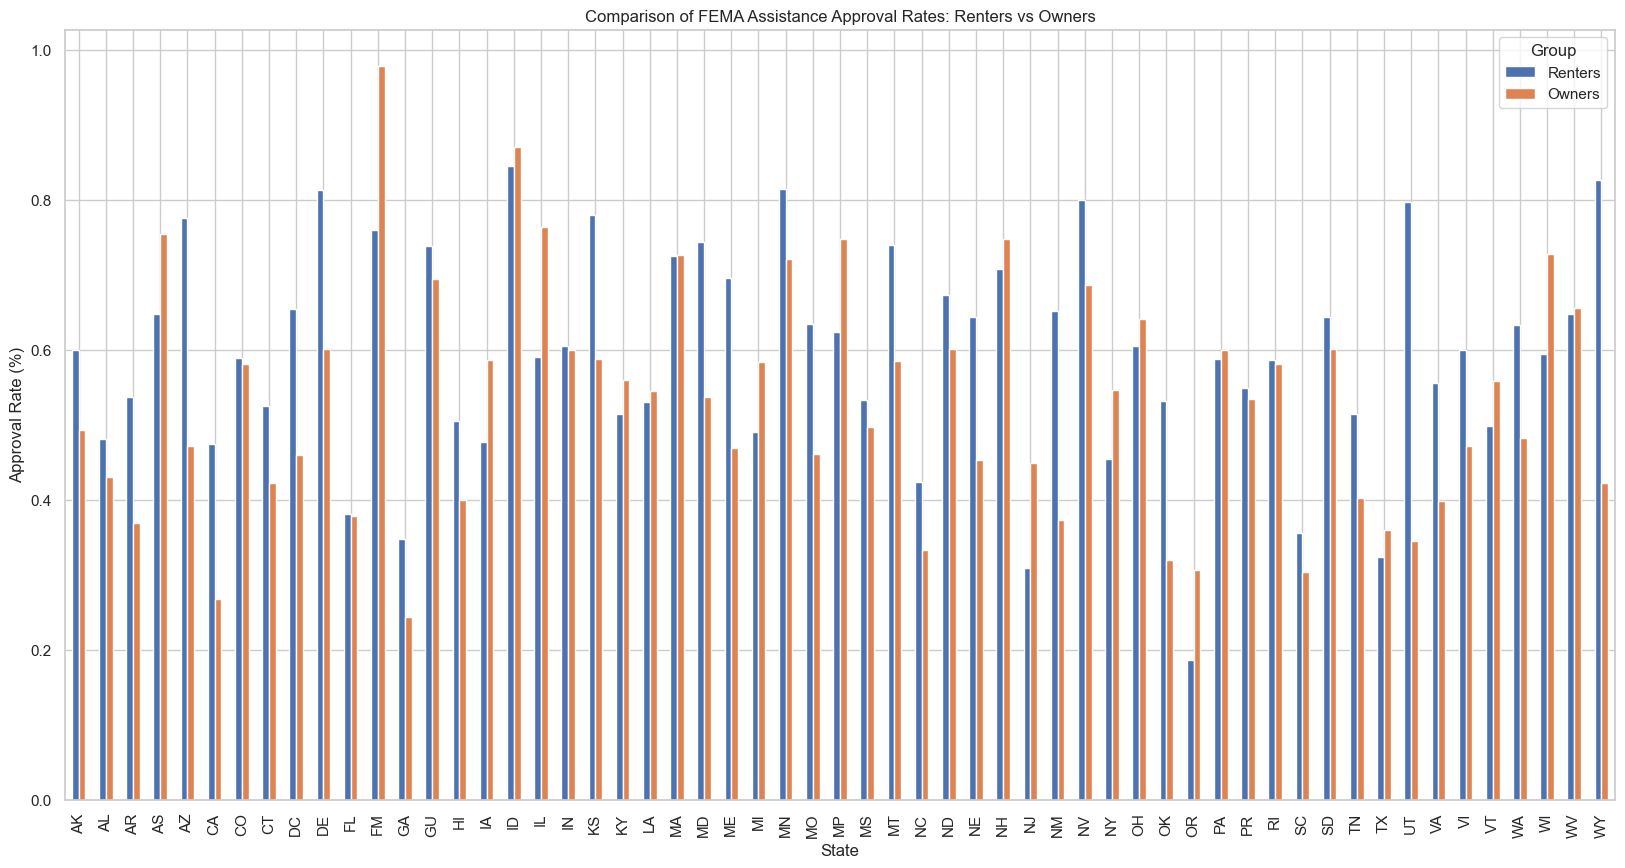

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data_renters = pd.read_csv("HousingAssistanceRenters.csv")
data_owners = pd.read_csv("HousingAssistanceOwners.csv")

# Calculate approval rates
rate_renters = data_renters.groupby('state')['approvedForFemaAssistance'].sum() / data_renters.groupby('state')['validRegistrations'].sum()
rate_owners = data_owners.groupby('state')['approvedForFemaAssistance'].sum() / data_owners.groupby('state')['validRegistrations'].sum()

# Combine into a DataFrame
rates = pd.DataFrame({'Renters': rate_renters, 'Owners': rate_owners})

# Plot
rates.plot(kind='bar', figsize=(20, 10))
plt.title('Comparison of FEMA Assistance Approval Rates: Renters vs Owners')
plt.xlabel('State')
plt.ylabel('Approval Rate (%)')
plt.legend(title='Group')
plt.show()


This chart shows in each state whether it is easier for owners to apply for FEMA assistance or for renters to apply for FEMA assistance. Overall, the Passing rate of application from owners slightly exceed the Passing rate of application from renters. However, there are large differences within each state. Within each state, you can judge whether the approval rate for owner applications is higher or the approval rate for renter applications is higher based on the content displayed in the chart.

## Shiny App

To collect all the graphs into a single Shiny app with a sidebar that allows users to switch between different visualizations, we decided to integrate the entire application within a JupyterLab notebook. This approach facilitates the development process, enabling the visualization of complex datasets through an interactive web application directly from our notebook environment. To achieve this, we utilize the Uvicorn server as the underlying ASGI server to run our Shiny app within JupyterLab. Uvicorn provides a lightweight and efficient server that is compatible with asynchronous programming, making it an ideal choice for running Shiny apps that require real-time interactivity and responsiveness. By embedding the Uvicorn server startup commands within the notebook, we can initiate the Shiny app with a simple execution of a cell. This setup not only enhances our ability to analyze and visualize data but also simplifies the sharing and presentation of our findings, as everything is contained within a single `.   ipynb` file. Consequently, our team and stakeholders can easily access and interact with the various graphs through a unified interface, facilitating a deeper understanding of the underlying data insights.

In [ ]:
# import library
import asyncio
import uvicorn
from shiny import App, ui, render
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np

#Set the UI
app_ui_1 = ui.page_fluid(
    ui.layout_sidebar(
        ui.panel_sidebar(
            ui.input_radio_buttons("graph_choice", "Choose a graph:",
                                   choices=["Actual_vs_Predicted_Total_Approved_IHP_Amount_Renters",
                                            "Actual_vs_Predicted_Total_Approved_IHP_Amount_Owners",
                                            "Scatter_Plot_of_Total_Damage_vs_Total_Approved_IHP_Amount",
                                            "Top_10_Counties_by_Valid_Registrations",
                                            "Top_10_Counties_by_Major_Damage_Inspections",
                                            "Top_10_Counties_by_FEMA_Assistance_Approvals",
                                            "Valid_Registrations_vs_FEMA_Assistance_Approvals",
                                            "Gross_Income_Over_Index",
                                            "Florida_Income_Distribution",
                                            "Texas_Income_Distribution",
                                            "Florida_Home_Owners_Insurance_Distribution",
                                            "Florida_Home_Owners_Insurance_Proportion",
                                            "Texas_Home_Owners_Insurance_Distribution",
                                            "Texas_Home_Owners_Insurance_Proportion",
                                            "Logistic_Regression_Analysis_of_Home_Owners_Insurance_and_Gross_Income",
                                            "Texas_Logistic_Regression_Analysis_of_Home_Owners_Insurance_and_Gross_Income",
                                            "Valid_Registrations_and_Approved_for_FEMA_Assistance_by_State_Renters",
                                            "Valid_Registrations_and_Approved_for_FEMA_Assistance_by_State_Owners",
                                            "Rate_of_Approved_for_FEMA_Assistance_per_Valid_Registration_by_State_Renters",
                                            "Rate_of_Approved_for_FEMA_Assistance_per_Valid_Registration_by_State_Owners",
                                            "Comparison_of_FEMA_Assistance_Approval_Rates_Renters_vs_Owners",
                                            "Correlation_between_Rankings_of_Valid_Registrations_and_Total_Approved_IHP_Amounts"])
        ),
        ui.panel_main(
            ui.output_plot("selected_graph")
        )
    )
)

#Define the Server
def server(input, output, session):
    @output
    @render.plot
    def selected_graph():
        choice = input.graph_choice()
        if choice == "Actual_vs_Predicted_Total_Approved_IHP_Amount_Renters":
            fig = Figure(figsize=(10, 6))
            ax = fig.subplots()
            ax.scatter(y_renters, y_renters_pred, alpha=0.5)
            ax.set_title('Actual vs Predicted Total Approved IHP Amount (Renters)')
            ax.set_xlabel('Actual Total Approved IHP Amount ($)')
            ax.set_ylabel('Predicted Total Approved IHP Amount ($)')
            ax.set_xscale('log')
            ax.set_yscale('log')
            ax.plot([y_renters.min(), y_renters.max()], [y_renters.min(), y_renters.max()], 'k--', lw=4)
            ax.grid(True, which="both", ls="--")
            return fig
        elif choice == "Actual_vs_Predicted_Total_Approved_IHP_Amount_Owners":
            fig = Figure(figsize=(10, 6))
            ax = fig.subplots()
            ax.scatter(y_owners, y_owners_pred, alpha=0.5)
            ax.set_title('Actual vs Predicted Total Approved IHP Amount (Owners)')
            ax.set_xlabel('Actual Total Approved IHP Amount ($)')
            ax.set_ylabel('Predicted Total Approved IHP Amount ($)')
            ax.set_xscale('log')
            ax.set_yscale('log')
            ax.plot([y_owners.min(), y_owners.max()], [y_owners.min(), y_owners.max()], 'k--', lw=4)
            ax.grid(True, which="both", ls="--")
            return fig
        elif choice == "Scatter_Plot_of_Total_Damage_vs_Total_Approved_IHP_Amount":
            fig = Figure(figsize=(10, 6))
            ax = fig.subplots()
            sns.scatterplot(x='total_valid_registrations', y='total_fema_assistance_approvals', data=combined_agg, ax=ax)
            ax.set_title('Valid Registrations vs. FEMA Assistance Approvals')
            ax.set_xlabel('Total Valid Registrations')
            ax.set_ylabel('Total FEMA Assistance Approvals')
            return fig
        elif choice == "Top_10_Counties_by_Valid_Registrations":
            fig = Figure(figsize=(10, 6))
            ax = fig.subplots()
            sns.barplot(x='total_valid_registrations', y='county', data=most_affected_by_registrations, ax=ax)
            ax.set_title('Top 10 Counties by Valid Registrations')
            ax.set_xlabel('Total Valid Registrations')
            ax.set_ylabel('County')
            return fig
        elif choice == "Top_10_Counties_by_Major_Damage_Inspections":
            fig = Figure(figsize=(10, 6))
            ax = fig.subplots()
            sns.barplot(x='total_major_damage_inspected', y='county', data=most_affected_by_major_damage, palette='Reds_d', ax=ax)
            ax.set_title('Top 10 Counties by Major Damage Inspections')
            ax.set_xlabel('Total Major Damage Inspected')
            ax.set_ylabel('County')
            return fig
        elif choice == "Top_10_Counties_by_FEMA_Assistance_Approvals":
            fig = Figure(figsize=(10, 6))
            ax = fig.subplots()
            sns.barplot(x='total_fema_assistance_approvals', y='county', data=most_affected_by_fema_approvals, palette='Greens_d', ax=ax)
            ax.set_title('Top 10 Counties by FEMA Assistance Approvals')
            ax.set_xlabel('Total FEMA Assistance Approvals')
            ax.set_ylabel('County')
            return fig                          
        elif choice == "Valid_Registrations_vs_FEMA_Assistance_Approvals":
            fig = Figure(figsize=(10, 6))
            ax = fig.subplots()
            sns.scatterplot(x='total_valid_registrations', y='total_fema_assistance_approvals', data=combined_agg, ax=ax)
            ax.set_title('Valid Registrations vs. FEMA Assistance Approvals')
            ax.set_xlabel('Total Valid Registrations')
            ax.set_ylabel('Total FEMA Assistance Approvals')
            return fig                         
        elif choice == "Gross_Income_Over_Index":
            fig = Figure(figsize=(10, 6))
            ax = fig.subplots()
            ax.plot(gross_income.index, gross_income.values, marker='o')
            ax.set_title('Gross Income Over Index')
            ax.set_xlabel('Index')
            ax.set_ylabel('Gross Income')
            return fig
        elif choice == "Florida_Income_Distribution":
            fig = Figure(figsize=(10, 6))
            ax = fig.subplots()
            income_distribution.plot.pie(ax=ax, autopct='%1.1f%%')
            ax.set_title('Florida Income Distribution')
            ax.set_ylabel('')
            return fig
        elif choice == "Texas_Income_Distribution":
            fig = Figure(figsize=(10, 6))
            ax = fig.subplots()
            income_distribution.plot.pie(ax=ax, autopct='%1.1f%%')
            ax.set_title('Texas Income Distribution')
            ax.set_ylabel('')
            return fig        
        elif choice == "Florida_Home_Owners_Insurance_Distribution":
            fig = Figure(figsize=(10, 6))
            ax = fig.subplots()
            insurance_distribution.plot.bar(ax=ax) 
            ax.set_title('Florida Home Owners Insurance Distribution')
            ax.set_xlabel('Florida Home Owners Insurance Status')
            ax.set_ylabel('Count')
            return fig
        elif choice == "Florida_Home_Owners_Insurance_Proportion":
            fig = Figure(figsize=(10, 6))
            ax = fig.subplots()
            insurance_distribution.plot.pie(ax=ax, labels=['Not Purchased', 'Purchased'], autopct='%1.1f%%')
            ax.set_title('Florida Home Owners Insurance Proportion')
            ax.set_ylabel('')
            return fig   
        elif choice == "Texas_Home_Owners_Insurance_Distribution":
            fig = Figure(figsize=(10, 6))
            ax = fig.subplots()
            insurance_distribution.plot.bar(ax=ax) 
            ax.set_title('Texas Home Owners Insurance Distribution')
            ax.set_xlabel('Texas Home Owners Insurance Status')
            ax.set_ylabel('Count')
            return fig
        elif choice == "Texas_Home_Owners_Insurance_Proportion":
            fig = Figure(figsize=(10, 6))
            ax = fig.subplots()
            insurance_distribution.plot.pie(ax=ax, labels=['Not Purchased', 'Purchased'], autopct='%1.1f%%')
            ax.set_title('Texas Home Owners Insurance Proportion')
            ax.set_ylabel('')
            return fig
        elif choice == "Logistic_Regression_Analysis_of_Home_Owners_Insurance_and_Gross_Income":
            fig = Figure(figsize=(10, 6))
            ax = fig.subplots()
            ax.scatter(X, y, color='blue', label='Actual Data')
            ax.plot(X, y_pred_prob, color='red', label='Logistic Regression Curve')
            ax.set_title('Logistic Regression Analysis of Home Owners Insurance and Gross Income')
            ax.set_xlabel('Gross Income')
            ax.set_ylabel('Probability of Purchasing Insurance')
            return fig
        elif choice == "Texas_Logistic_Regression_Analysis_of_Home_Owners_Insurance_and_Gross_Income":
            fig = Figure(figsize=(10, 6))
            ax = fig.subplots()
            ax.scatter(X, y, color='blue', label='Actual Data')
            ax.plot(X, y_pred_prob, color='red', label='Logistic Regression Curve')
            ax.set_title('Texas Logistic Regression Analysis of Home Owners Insurance and Gross Income')
            ax.set_xlabel('Gross Income')
            ax.set_ylabel('Probability of Purchasing Insurance')
            return fig
        elif choice == "Valid_Registrations_and_Approved_for_FEMA_Assistance_by_State_Renters":
            fig = Figure(figsize=(10, 6))
            ax = fig.subplots()
            rects1 = ax.bar(ind - width/2, valid_Registrations_per_state, width, label='Valid Registrations')
            rects2 = ax.bar(ind + width/2, approved_for_fema_per_state, width, label='Approved for FEMA Assistance')
            ax.set_xlabel('State')
            ax.set_ylabel('Counts')
            ax.set_title('Valid Registrations and Approved for FEMA Assistance by State (Renters)')
            ax.set_xticks(ind)
            ax.set_xticklabels(valid_Registrations_per_state.index, rotation='vertical')
            ax.legend()
            return fig
        elif choice == "Valid_Registrations_and_Approved_for_FEMA_Assistance_by_State_Owners":
            fig = Figure(figsize=(10, 6))
            ax = fig.subplots()
            rects1 = ax.bar(ind - width/2, valid_Registrations_per_state, width, label='Valid Registrations')
            rects2 = ax.bar(ind + width/2, approved_for_fema_per_state, width, label='Approved for FEMA Assistance')
            ax.set_xlabel('State')
            ax.set_ylabel('Counts')
            ax.set_title('Valid Registrations and Approved for FEMA Assistance by State (Owners)')
            ax.set_xticks(ind)
            ax.set_xticklabels(valid_Registrations_per_state.index, rotation='vertical')
            ax.legend()
            return fig
        elif choice == "Rate_of_Approved_for_FEMA_Assistance_per_Valid_Registration_by_State_Renters":
            fig = Figure(figsize=(10, 6))
            ax = fig.subplots()
            ax.bar(state_rates_sorted.index, state_rates_sorted.values, color='skyblue')
            ax.axhline(y=overall_average_rate, color='r', linestyle='--', label=f'Overall Average Rate: {overall_average_rate:.2f}%')
            ax.set_xlabel('State', fontsize=14)
            ax.set_ylabel('Percentage (%)', fontsize=14)
            ax.set_title('Rate of Approved for FEMA Assistance per Valid Registration by State (Renters)', fontsize=16)
            ax.tick_params(axis='x', rotation=90)
            ax.legend()
            ax.grid(axis='y')
            return fig
        elif choice == "Rate_of_Approved_for_FEMA_Assistance_per_Valid_Registration_by_State_Owners":
            fig = Figure(figsize=(10, 6))
            ax = fig.subplots()
            ax.bar(state_rates_sorted.index, state_rates_sorted.values, color='skyblue')
            ax.axhline(y=overall_average_rate, color='r', linestyle='--', label=f'Overall Average Rate: {overall_average_rate:.2f}%')
            ax.set_xlabel('State', fontsize=14)
            ax.set_ylabel('Percentage (%)', fontsize=14)
            ax.set_title('Rate of Approved for FEMA Assistance per Valid Registration by State (owners)', fontsize=16)
            ax.tick_params(axis='x', rotation=90)
            ax.legend()
            ax.grid(axis='y')
            return fig
        elif choice == "Comparison_of_FEMA_Assistance_Approval_Rates_Renters_vs_Owners":
            fig = Figure(figsize=(10, 6))
            ax = fig.subplots()
            rates.plot(kind='bar', ax=ax)
            ax.set_title('Comparison of FEMA Assistance Approval Rates: Renters vs Owners')
            ax.set_xlabel('State')
            ax.set_ylabel('Approval Rate (%)')
            ax.legend(title='Group')
            return fig
        elif choice == "Correlation_between_Rankings_of_Valid_Registrations_and_Total_Approved_IHP_Amounts":
            fig = Figure(figsize=(10, 6))
            ax = fig.subplots()
            sns.scatterplot(x='Rank', y='IhpAmountRank', data=merged_data, ax=ax)
            ax.set_title('Correlation between Rankings of Valid Registrations and Total Approved IHP Amounts')
            ax.set_xlabel('Rank by Valid Registrations')
            ax.set_ylabel('Rank by Total Approved IHP Amounts')
            ax.invert_yaxis()  # Inverting y-axis
            ax.text(5, 95, f'Correlation Coefficient: {correlation:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
            return fig
        
app_1 = App(app_ui_1, server)

if __name__ == "__main__":
    config = uvicorn.Config(app_1, port=8001, log_level="info")
    server = uvicorn.Server(config)
    await server.serve()

INFO:     Started server process [65884]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8001 (Press CTRL+C to quit)


INFO:     127.0.0.1:53018 - "GET / HTTP/1.1" 200 OK


INFO:     ('127.0.0.1', 53019) - "WebSocket /websocket/" [accepted]
INFO:     connection open


## Conclusion

Our analysis, facilitated by an interactive Shiny app within JupyterLab, has provided valuable insights into the intricate dynamics of disaster relief and insurance decisions. While we observed positive trends and correlations that affirm the effectiveness and reasonableness of FEMA's assistance programs, our findings also underscore the complexity of these issues and the need for further analysis. The differences in approval rates between renters and owners, along with the significant role of income in insurance decisions, highlight areas for potential policy refinement and further research. By integrating our visualizations into a single, interactive platform, we not only enhance the accessibility of our findings but also open the door for deeper engagement with these critical issues, paving the way for informed decision-making and policy development in disaster relief efforts.